# **NAME**- SWASTIK ROY CHOUDHURY

### **Email Id** - swastikroychoudhury014@gmail.com



# **Title**
**FutureCart**: *AI-Driven Demand Prediction for Smarter Retail.*

## **Project Statement:**
In the realm of E-commerce, demand forecasting plays a pivotal role in ensuring business success. This project aims to develop a demand forecasting model in an E-commerce business that predicts future product demand leveraging time series analysis and multivariate regression based on historical sales data, along with Google Analytics KPIs such as Google clicks and Facebook impressions, which are valuable indicators of customer interest.

## **Outcomes**

**>Improved Inventory Management:** More accurate demand forecasts lead to better inventory decisions, potentially reducing stock-outs and excess inventory.

**>Enhanced Marketing Efficiency:** Identify periods of high demand for targeted marketing campaigns, optimizing resource allocation.

**>Data-Driven Decision Making:** Reliable forecasts provide a basis for business decisions, such as pricing adjustments or product promotions.

**>Accurate Demand Predictions:** Implement a forecasting model that achieves high accuracy in predicting future demands, thereby improving customer service levels.

**>Scalable Solution:** Develop a solution that can scale to handle large datasets and varying demand patterns across multiple products.

# **Milestone 1: Week 1**
## Module 1: Data Collection
• Understanding the problem statement

• Gathering sales data from relevant sources (database, store records)

• Collecting Google Analytics and Facebook Impressions data

In [ ]:
from google.colab import drive
# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


**Datasets Used**

In [ ]:
import pandas as pd

# Loading the Excel files from your Google Drive
df1 = pd.read_excel('/content/drive/MyDrive/Data/ProductA.xlsx')
df2 = pd.read_excel('/content/drive/MyDrive/Data/ProductA_fb_impressions.xlsx')
df3 = pd.read_excel('/content/drive/MyDrive/Data/ProductA_google_clicks.xlsx')

# Displaying the first 5 rows of each DataFrame
print("Top 5 rows of ProductA.xlsx:")
print(df1.head())

print("\nTop 5 rows of ProductA_fb_impressions.xlsx:")
print(df2.head())

print("\nTop 5 rows of ProductA_google_clicks.xlsx:")
print(df3.head())


Top 5 rows of ProductA.xlsx:
   Day Index  Quantity
0 2021-12-01        14
1 2021-12-02        10
2 2021-12-03        13
3 2021-12-04        22
4 2021-12-05        33

Top 5 rows of ProductA_fb_impressions.xlsx:
   Day Index  Impressions
0 2021-12-01          620
1 2021-12-02          890
2 2021-12-03          851
3 2021-12-04          881
4 2021-12-05          678

Top 5 rows of ProductA_google_clicks.xlsx:
   Day Index  Clicks
0 2021-12-01     445
1 2021-12-02     433
2 2021-12-03     424
3 2021-12-04     427
4 2021-12-05     451


**MERGING THE DATASETS INTO A MASTER DATASET**

In [ ]:
import pandas as pd

# Loading the Excel files from Google Drive
df1 = pd.read_excel('/content/drive/MyDrive/Data/ProductA.xlsx')
df2 = pd.read_excel('/content/drive/MyDrive/Data/ProductA_fb_impressions.xlsx')
df3 = pd.read_excel('/content/drive/MyDrive/Data/ProductA_google_clicks.xlsx')

# Merge the DataFrames on 'Day Index' using left join
merged_df = df1.merge(df2, how="left", on='Day Index').merge(df3, how="left", on='Day Index')

# All rows and columns of the merged DataFrame are displayed below
print(merged_df)

# Saving the merged DataFrame to a new Excel file
output_file_path = '/content/drive/MyDrive/Data/Master_ProductA_dataset.xlsx'
merged_df.to_excel(output_file_path, index=False)
print(f"Merged dataset saved as '{output_file_path}'")



     Day Index  Quantity  Impressions  Clicks
0   2021-12-01        14          620     445
1   2021-12-02        10          890     433
2   2021-12-03        13          851     424
3   2021-12-04        22          881     427
4   2021-12-05        33          678     451
..         ...       ...          ...     ...
207 2022-06-26        13         1218     114
208 2022-06-27        16         1311     106
209 2022-06-28        13          885     109
210 2022-06-29        16         1000      60
211 2022-06-30         8          875      65

[212 rows x 4 columns]
Merged dataset saved as '/content/drive/MyDrive/Data/Master_ProductA_dataset.xlsx'


# **Milestone 1: Week 2**
## Module 2: Exploratory Data Analysis (EDA) and Data Preprocessing

• Ensuring my sales data is in a time series format (e.g., daily, weekly, monthly) with timestamps.

• Cleaning and formating data, handling missing values and outliers. Address them using appropriate techniques (imputation, elimination).

• Ploting the distribution plots on independent variables.

• Visualizations to understand trends, seasonality, and correlations.

• Statistical summaries.

**BASIC CHECKS ON DAILY TRENDS**

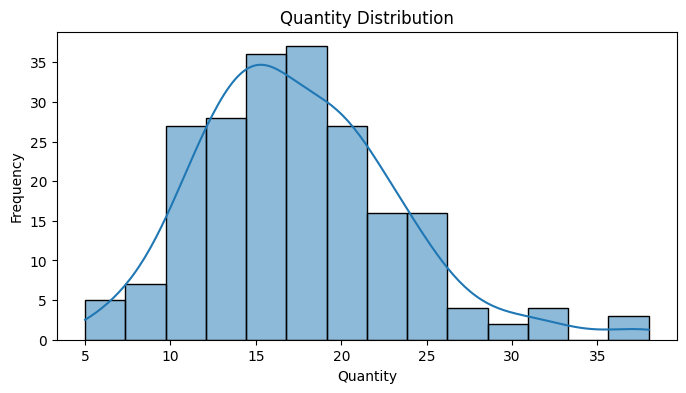

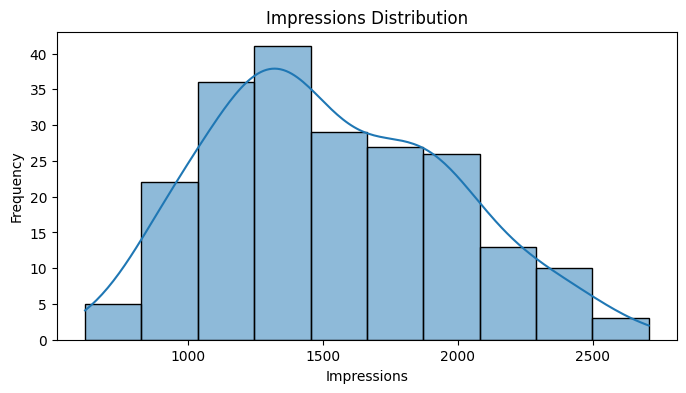

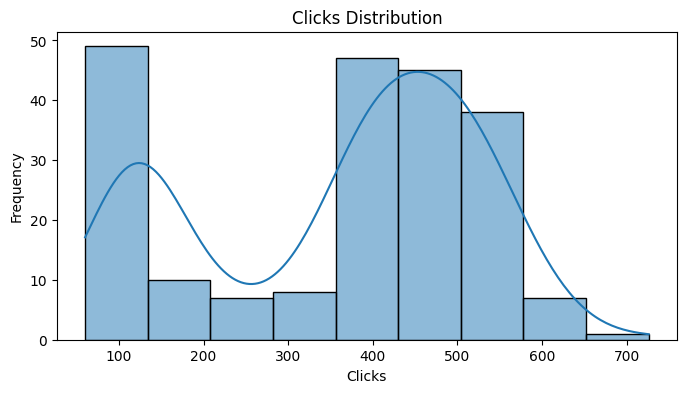

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

# Loading the dataset
file_path = '/content/drive/MyDrive/Data/Master_ProductA_dataset.xlsx'
df = pd.read_excel(file_path, sheet_name='Sheet1')

## Distribution Plots with Insights
for col in ['Quantity', 'Impressions', 'Clicks']:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True)
    plt.title(f'{col} Distribution')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

### **Observations from the Distribution Plots**

- I analyzed the distribution of **Quantity**, **Impressions**, and **Clicks** to understand the data spread and identify any skewness or outliers.
- Here are my insights from each distribution plot:

   1. Each plot clearly shows the overall data spread for the respective feature, helping me identify skewness or outliers in the data.
   2. Peaks within these distributions indicate common value ranges, suggesting typical behavior or stable periods.
   3. Higher peaks likely represent frequent events or periods with steady demand, providing insights into regular patterns.
   4. Valleys or dips in the distributions reveal less common occurrences, potentially pointing to gaps or less frequent demand.
   5. These plots are essential for assessing the data distribution, identifying unusual data points, and informing any data cleaning steps required.

**SALES(QUANTITY THROUGH TIME)**

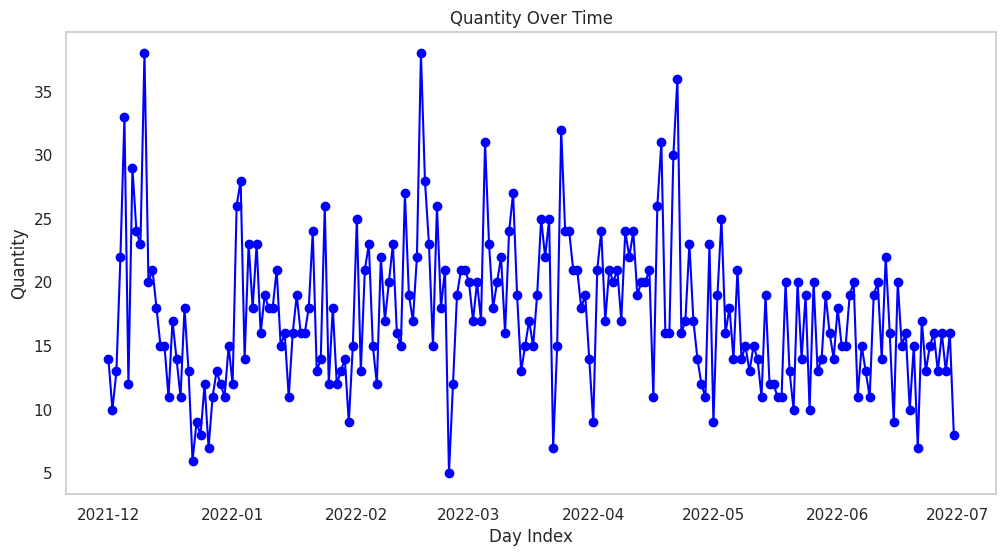

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = '/content/drive/MyDrive/Data/Master_ProductA_dataset.xlsx'
df = pd.read_excel(file_path)

# Plot Quantity over time (Day Index)
plt.figure(figsize=(12, 6))
plt.plot(df['Day Index'], df['Quantity'], color='blue', marker='o', linestyle='-')
plt.title('Quantity Over Time')
plt.xlabel('Day Index')
plt.ylabel('Quantity')
plt.grid()
plt.show()


**Quantity Over Time:**

*  I was noticing fluctuations in the quantity values across different days. Some days were showing spikes, which might have been indicating high-demand periods or special events.
*  I was observing consistent patterns on other days, suggesting regular activity.

**CLICKS THROUGH TIME**

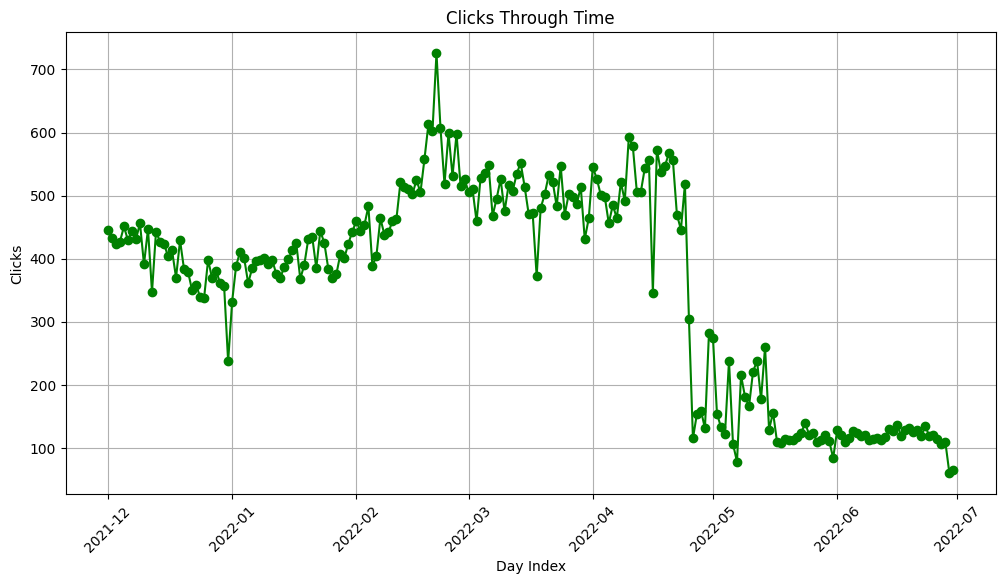

In [ ]:
import pandas as pd

# Load the uploaded dataset to examine its structure
file_path = '/content/drive/MyDrive/Data/Master_ProductA_dataset.xlsx'
df = pd.read_excel(file_path)

import matplotlib.pyplot as plt

# Ensure 'Day Index' is in datetime format for better plotting
df['Day Index'] = pd.to_datetime(df['Day Index'])

# Plot Clicks Through Time
plt.figure(figsize=(12, 6))
plt.plot(df['Day Index'], df['Clicks'], color='green', marker='o', linestyle='-')
plt.title('Clicks Through Time')
plt.xlabel('Day Index')
plt.ylabel('Clicks')
plt.grid()
plt.xticks(rotation=45)
plt.show()

**Clicks Through Time:**

*  As I was plotting clicks over time, I was identifying certain days where the clicks were peaking, possibly aligning with user engagement during specific campaigns or promotions.

*  I was noticing lower values on some days, which might have been reflecting reduced user activity or less effective marketing.

# **IMPRESSION THROUGH TIME**

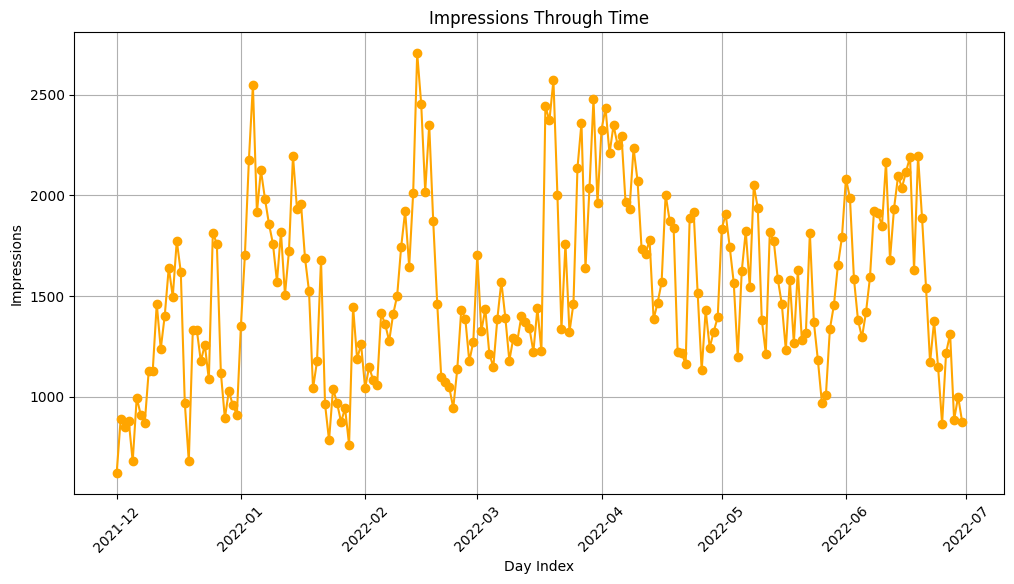

In [ ]:

# Plot Impressions Through Time
plt.figure(figsize=(12, 6))
plt.plot(df['Day Index'], df['Impressions'], color='orange', marker='o', linestyle='-')
plt.title('Impressions Through Time')
plt.xlabel('Day Index')
plt.ylabel('Impressions')
plt.grid()
plt.xticks(rotation=45)
plt.show()





**Impressions Through Time:**

*  When I was examining impressions, I was seeing trends where visibility was either increasing or remaining steady on certain days.

*  I was also identifying some dips in impressions, which could have been caused by external factors like reduced ad spend or visibility.

**Detecting Missing Values and Cleaning Dataset**

In [ ]:
import pandas as pd

# Loading the uploaded Excel file

data = pd.read_excel('/content/drive/MyDrive/Data/Master_ProductA_dataset.xlsx')

# Finding missing values
missing_values = data.isnull().sum()

# Display the count of missing values for each column
print(missing_values)

Day Index      0
Quantity       0
Impressions    0
Clicks         0
dtype: int64


**No Missing Values Detected**

**DROPPING DUPLICATES**

In [ ]:
import pandas as pd

# Load the uploaded Excel file
data = pd.read_excel('/content/drive/MyDrive/Data/Master_ProductA_dataset.xlsx')

# Drop duplicate rows
data = data.drop_duplicates()

# Verify if duplicates are dropped
print("Number of rows after dropping duplicates:", data.shape[0])


Number of rows after dropping duplicates: 212


**BOXPLOTS**

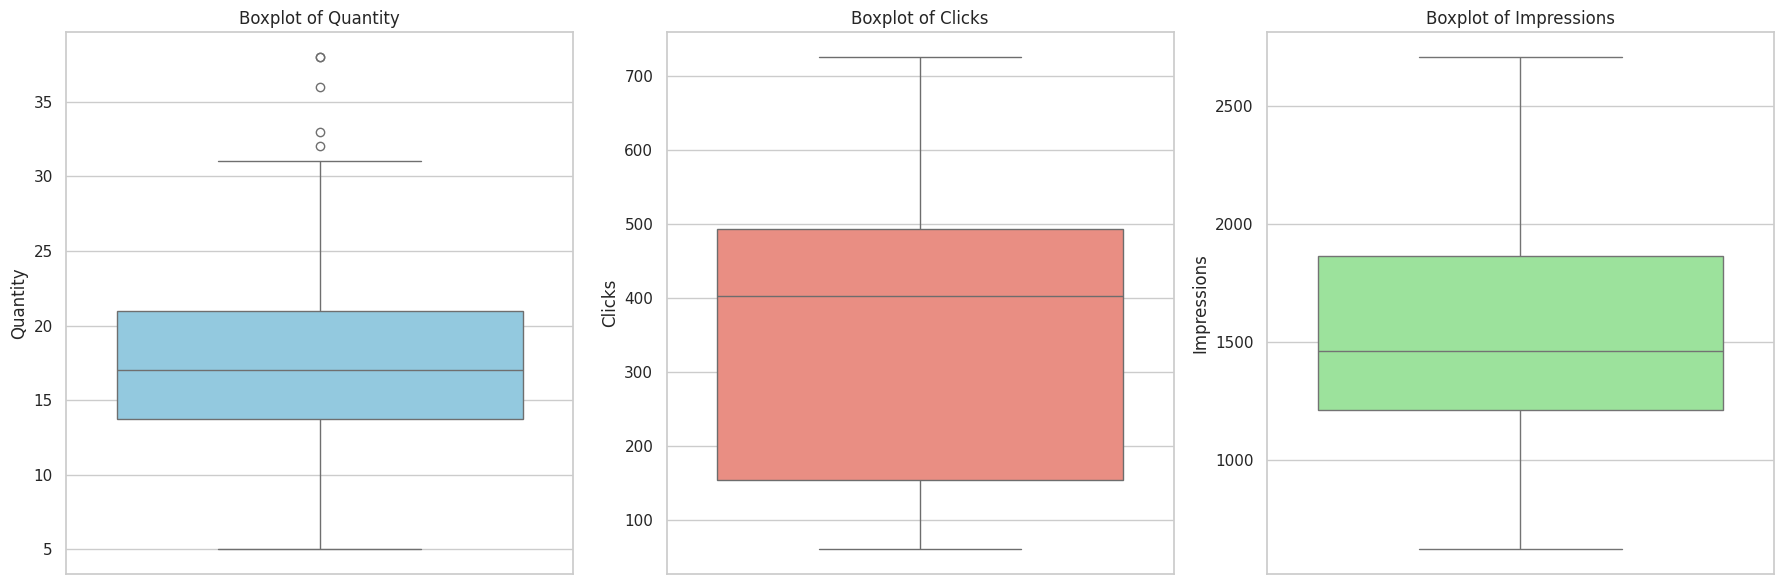

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = '/content/drive/MyDrive/Data/Master_ProductA_dataset.xlsx'
df = pd.read_excel(file_path)

# Set style for plots
sns.set(style="whitegrid")

# Create boxplots for 'Quantity', 'Clicks', and 'Impressions' columns
plt.figure(figsize=(18, 6))

# Boxplot for 'Quantity'
plt.subplot(1, 3, 1)
sns.boxplot(y=df['Quantity'], color='skyblue')
plt.title('Boxplot of Quantity')

# Boxplot for 'Clicks'
plt.subplot(1, 3, 2)
sns.boxplot(y=df['Clicks'], color='salmon')
plt.title('Boxplot of Clicks')

# Boxplot for 'Impressions'
plt.subplot(1, 3, 3)
sns.boxplot(y=df['Impressions'], color='lightgreen')
plt.title('Boxplot of Impressions')

plt.tight_layout()
plt.show()


**DETECTING OUTLIERS**

In [ ]:
import pandas as pd

# Loading the dataset
df = pd.read_excel('/content/drive/MyDrive/Data/Master_ProductA_dataset.xlsx')

def find_outliers_IQR(df):
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    iqr = q3 - q1

    outliers = df[((df < (q1 - 1.5 * iqr)) | (df > (q3 + 1.5 * iqr)))]
    return outliers

print("Outliers in each dependent attribute:")
print(f"Quantity:\t {len(find_outliers_IQR(df['Quantity']))}")
print(f"Clicks:\t\t {len(find_outliers_IQR(df['Clicks']))}")
print(f"Impressions:\t {len(find_outliers_IQR(df['Impressions']))}")


Outliers in each dependent attribute:
Quantity:	 5
Clicks:		 0
Impressions:	 0


In [ ]:
print(f"Quantity:\n{find_outliers_IQR(df['Quantity'])}")

Quantity:
4      33
9      38
78     38
113    32
142    36
Name: Quantity, dtype: int64


**5 Outliers in Quantity Attribute**

**REPLACING OUTLIERS**

In [ ]:
percentile_95_value =df["Quantity"].quantile(0.97)
print(percentile_95_value)

30.669999999999987


In [ ]:
def impute_outliers_97th_percentile(series):
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    percentile_95_value =series.quantile(0.97)
    return series.apply(lambda x: percentile_95_value if x < lower_bound or x > upper_bound else x)

# Apply the function to the 'Quantity' column
df['imputed_Quantity'] = impute_outliers_97th_percentile(df['Quantity'])

print(df.head())

# I am saving the modified dataset to a new Excel file named 'cleaned.xlsx'
df.to_excel('/content/drive/MyDrive/Data/cleaned.xlsx', index=False)

print("Modified dataset saved to 'cleaned.xlsx'")

   Day Index  Quantity  Impressions  Clicks  imputed_Quantity
0 2021-12-01        14          620     445             14.00
1 2021-12-02        10          890     433             10.00
2 2021-12-03        13          851     424             13.00
3 2021-12-04        22          881     427             22.00
4 2021-12-05        33          678     451             30.67
Modified dataset saved to 'cleaned.xlsx'


In [ ]:
print("Outliers in each dependent attribute:")

print(f"Quantity:\t {len(find_outliers_IQR(df['imputed_Quantity']))}")

Outliers in each dependent attribute:
Quantity:	 0


**AFTER OUTLIERS' TREATMENT SALES(QUANTITY THROUGH TIME)**

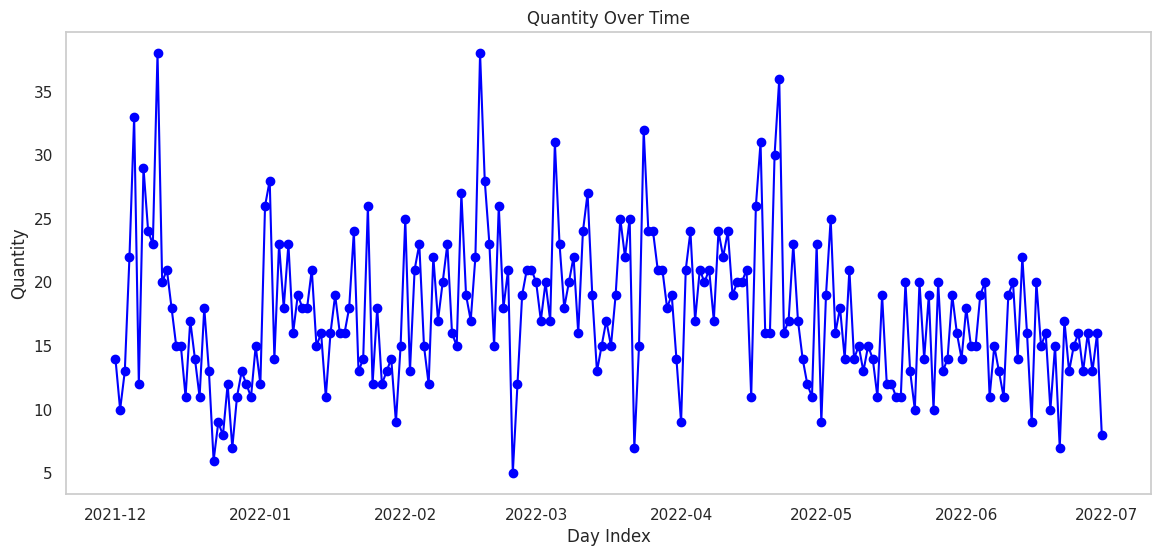

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = '/content/drive/MyDrive/Data/cleaned.xlsx'
df = pd.read_excel(file_path)

# Plot Quantity over time (Day Index)
plt.figure(figsize=(14, 6))
plt.plot(df['Day Index'], df['Quantity'], color='blue', marker='o', linestyle='-')
plt.title('Quantity Over Time')
plt.xlabel('Day Index')
plt.ylabel('Quantity')
plt.grid()
plt.show()

 **THE PLOTS FOR CLICKS AND IMPRESSIONS IS SAME AS THERE IS NO OUTLIERS FOUND**

 **Feature Engineering**

In [ ]:
import pandas as pd

# Load the dataset
dataset = pd.read_excel('/content/drive/MyDrive/Data/cleaned.xlsx')

# Convert 'Day Index' to datetime format for date-based operations
dataset['Day Index'] = pd.to_datetime(dataset['Day Index'])

#Adding Month Name column
dataset['Month Name'] = dataset['Day Index'].dt.month_name()
month_dummies = pd.get_dummies(dataset['Month Name'], prefix='', prefix_sep='').astype(int)


# 1) Adding 'Weekend' column (1 if the day is Saturday or Sunday, otherwise 0)
dataset['Weekend'] = dataset['Day Index'].dt.weekday.isin([5, 6]).astype(int)

# 2) Adding 'Day of Week' column
dataset['Day of Week'] = dataset['Day Index'].dt.day_name()

# 3-9) Adding columns for each day of the week (1 if that day, otherwise 0)
days_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
for day in days_of_week:
    dataset[day] = (dataset['Day of Week'] == day).astype(int)

# 10-21) Adding columns for each month (1 if the date is in that month, otherwise 0)
months_of_year = ['January', 'February', 'March', 'April', 'May', 'June',
                  'July', 'August', 'September', 'October', 'November', 'December']
for i, month in enumerate(months_of_year, start=1):
    dataset[month] = (dataset['Day Index'].dt.month == i).astype(int)


# Save the modified dataset to a new Excel file named 'enhanced.xlsx'
dataset.to_excel('/content/drive/MyDrive/Data/enhanced_file.xlsx', index=False)

print("Enhanced dataset saved to 'enhanced_file.xlsx'")

Enhanced dataset saved to 'enhanced_file.xlsx'


**ADDING NEW COLUMNS TO THE DATASET**

In [ ]:
import pandas as pd

# Loading the data
data = pd.read_excel('/content/drive/MyDrive/Data/enhanced_file.xlsx')

# Setting display options to show all rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)


# Displaying all rows of the dataset
data.head(len(data))




,Day Index,Quantity,Impressions,Clicks,imputed_Quantity,Month Name,Weekend,Day of Week,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,January,February,March,April,May,June,July,August,September,October,November,December
0,2021-12-01,14,620,445,14.00,December,0,Wednesday,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2021-12-02,10,890,433,10.00,December,0,Thursday,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,2021-12-03,13,851,424,13.00,December,0,Friday,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,2021-12-04,22,881,427,22.00,December,1,Saturday,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
4,2021-12-05,33,678,451,30.67,December,1,Sunday,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
5,2021-12-06,12,995,429,12.00,December,0,Monday,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
6,2021-12-07,29,910,444,29.00,December,0,Tuesday,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
7,2021-12-08,24,867,431,24.00,December,0,Wednesday,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
8,2021-12-09,23,1128,456,23.00,December,0,Thursday,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
9,2021-12-10,38,1129,391,30.67,December,0,Friday,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1


**Exploratory Data Analysis (EDA)**

 ***Descriptive Statistics:***

In [ ]:
import pandas as pd

# Load the dataset
file_path = '/content/drive/MyDrive/Data/enhanced_file.xlsx'
df = pd.read_excel(file_path)

# Get descriptive statistics
descriptive_stats = df.describe()

# Save descriptive statistics to an Excel file
output_file = '/content/drive/MyDrive/Data/distributions.xlsx'
descriptive_stats.to_excel(output_file, sheet_name='Descriptive Statistics')

# Display all rows and columns for the descriptive statistics
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Display the descriptive statistics in a styled format
styled_stats = descriptive_stats.style.set_properties(**{'border': '1px solid black', 'color': 'black'}) \
                    .set_table_styles([{
                        'selector': 'th',
                        'props': [('background-color', 'lightgrey'),
                                  ('border', '1px solid black')]
                    }, {
                        'selector': 'td',
                        'props': [('border', '1px solid black')]
                    }])

# Display styled output
styled_stats



,Day Index,Quantity,Impressions,Clicks,imputed_Quantity,Weekend,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,January,February,March,April,May,June,July,August,September,October,November,December
count,212,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000
mean,2022-03-16 12:00:00,17.542453,1531.702830,358.202830,17.430896,0.283019,0.141509,0.141509,0.146226,0.146226,0.141509,0.141509,0.141509,0.146226,0.132075,0.146226,0.141509,0.146226,0.141509,0.000000,0.000000,0.000000,0.000000,0.000000,0.146226
min,2021-12-01 00:00:00,5.000000,620.000000,60.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2022-01-22 18:00:00,13.750000,1209.750000,154.000000,13.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2022-03-16 12:00:00,17.000000,1460.000000,402.500000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2022-05-08 06:00:00,21.000000,1862.000000,492.750000,21.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2022-06-30 00:00:00,38.000000,2707.000000,726.000000,31.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
std,nan,5.790423,440.660783,164.521600,5.467691,0.451532,0.349371,0.349371,0.354169,0.354169,0.349371,0.349371,0.349371,0.354169,0.339374,0.354169,0.349371,0.354169,0.349371,0.000000,0.000000,0.000000,0.000000,0.000000,0.354169


**DATA ANALYSIS**

**Pie Chart for Day of the Week Distributions for Quantity,Clicks & Impression**

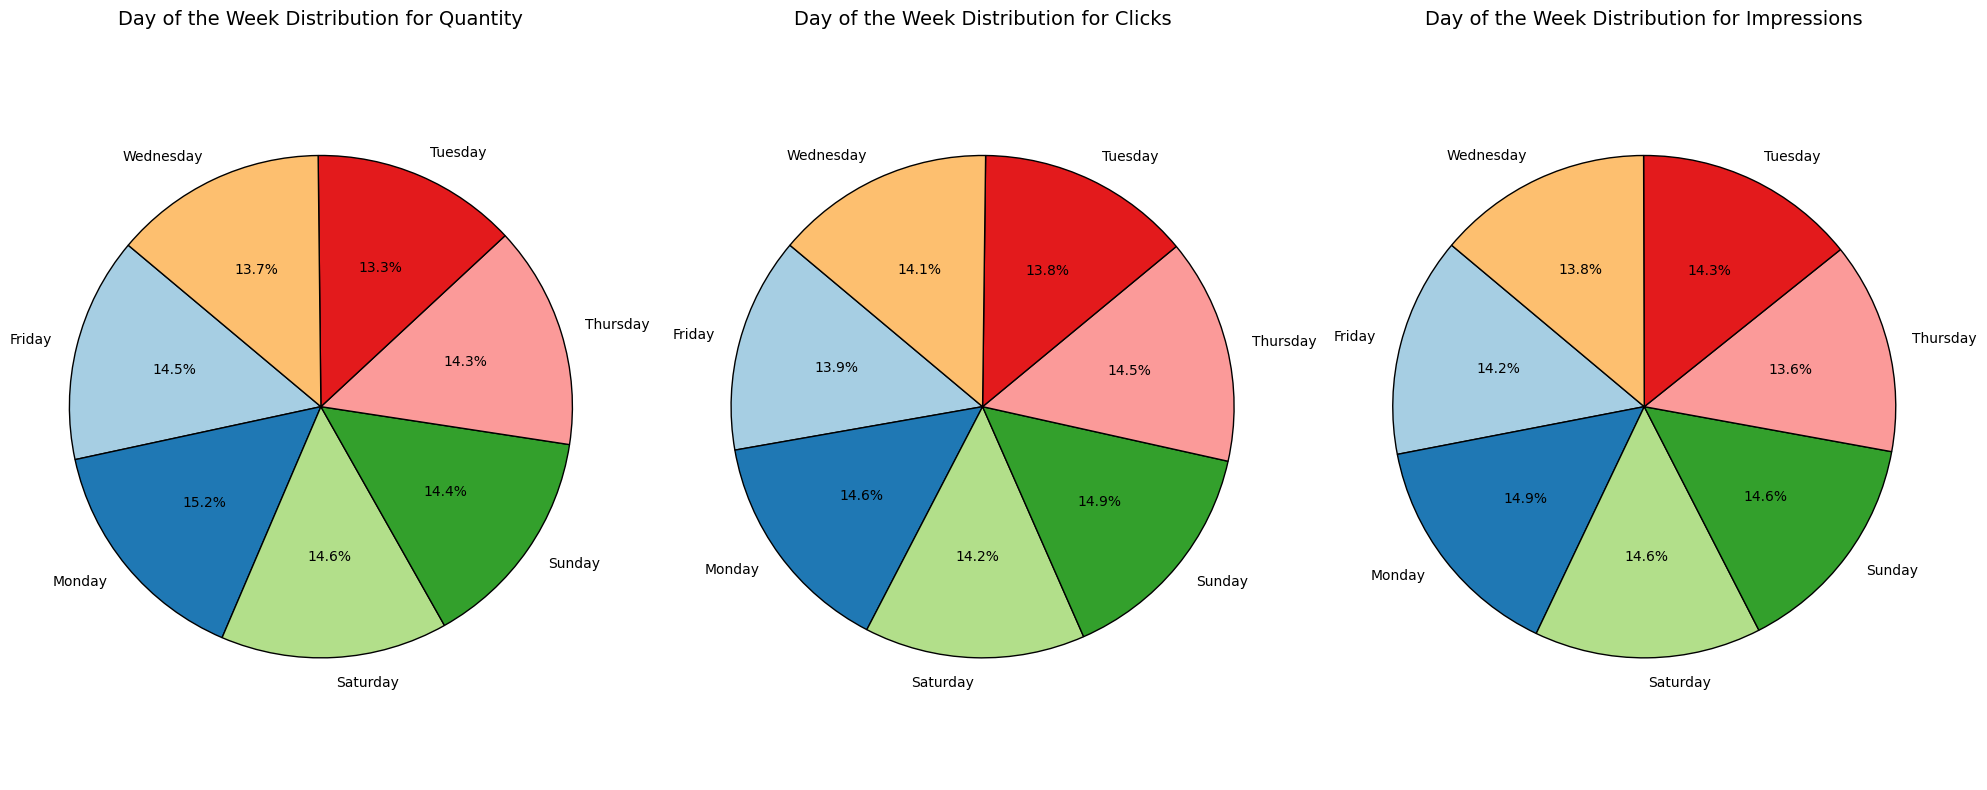

In [ ]:
# Add a column for the day of the week
df['Day of Week'] = df['Day Index'].dt.strftime('%A')

# Function to plot pie chart for Day of the Week distribution
def plot_daywise_pie(df, x_col, y_col, title, ax):
    # Group by the specified column and calculate the sum
    df_grouped = df.groupby(x_col)[y_col].sum().reset_index()

    sizes = df_grouped[y_col]
    labels = df_grouped[x_col]

    # Plot pie chart with improved aesthetics
    ax.pie(
        sizes,
        labels=labels,
        autopct='%1.1f%%',
        startangle=140,
        colors=plt.cm.Paired.colors,
        wedgeprops={'edgecolor': 'black'}
    )
    ax.set_title(title, fontsize=14)
    ax.axis('equal')  # Ensure the pie chart is a perfect circle

# Create subplots for Quantity, Clicks, and Impressions
fig, axes = plt.subplots(1, 3, figsize=(20, 8))

# Plot each metric in a separate subplot
plot_daywise_pie(df, 'Day of Week', 'Quantity', 'Day of the Week Distribution for Quantity', axes[0])
plot_daywise_pie(df, 'Day of Week', 'Clicks', 'Day of the Week Distribution for Clicks', axes[1])
plot_daywise_pie(df, 'Day of Week', 'Impressions', 'Day of the Week Distribution for Impressions', axes[2])

# Adjust layout for better readability
plt.tight_layout()
plt.show()


### 1. **Quantity Distribution**:
- I was noticing that certain days were showing higher quantities compared to others, indicating a possible trend or peak in activity.
- For example, I might have been observing that **Monday** and **Thursday** were having larger slices, suggesting that sales or stock movements were being concentrated on these days.

**Insight**: I was identifying key days for replenishment or focusing on supply chain activities.


### 2. **Clicks Distribution**:
- I was observing that days with higher **Clicks** were indicating peak user engagement. These days might have been aligning with marketing campaigns or user habits.
- If **Friday** and **Saturday** were showing higher proportions, it was possibly indicating that more users were browsing before the weekend.

**Insight**: I was realizing that ad campaigns or promotions could have been optimized for days with higher engagement.


### 3. **Impressions Distribution**:
- I was noticing that certain days with higher impressions were indicating when the product or advertisement was most visible to the audience.
- For instance, if **Wednesday** was showing a high percentage, it might have been suggesting that more active online audiences were being reached during mid-week.

**Insight**: I was understanding that ad scheduling could have been refined to maximize reach during high-visibility days.



### General Recommendations:
1. **Optimization**:
   - I was aligning marketing efforts and resource allocation with days showing peak activity.
   - I might have been focusing on underperforming days to balance overall engagement.

2. **Scheduling**:
   - I was ensuring that if one metric (e.g., impressions) was peaking earlier in the week, promotions or conversion-focused campaigns were following immediately.

3. **User Behavior**:
   - I was noticing that if clicks and impressions were correlating with specific days, they might have been aligning with customer habits, such as payday shopping or weekend browsing.


**Scatter Plots Analysis**

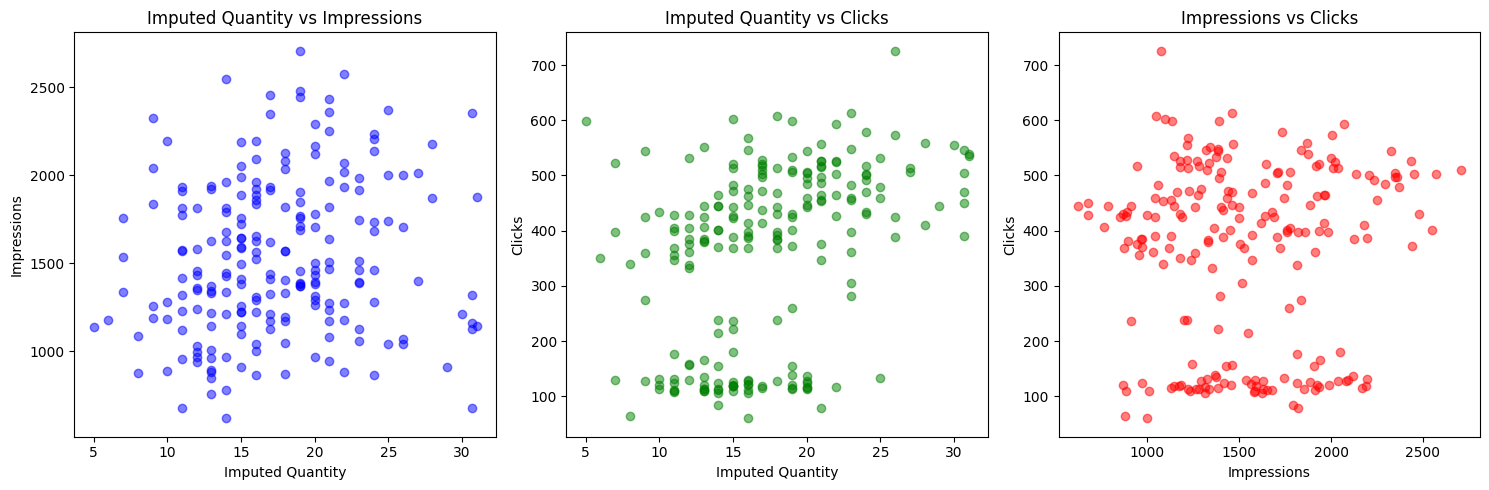

In [ ]:
# Scatter plot for pairwise analysis among "imputed quantity", "clicks", and "impressions"

# Set the plot size
plt.figure(figsize=(15, 5))

# Scatter plot 1: Imputed Quantity vs Impressions
plt.subplot(1, 3, 1)
plt.scatter(data['imputed_Quantity'], data['Impressions'], color='b', alpha=0.5)
plt.xlabel('Imputed Quantity')
plt.ylabel('Impressions')
plt.title('Imputed Quantity vs Impressions')

# Scatter plot 2: Imputed Quantity vs Clicks
plt.subplot(1, 3, 2)
plt.scatter(data['imputed_Quantity'], data['Clicks'], color='g', alpha=0.5)
plt.xlabel('Imputed Quantity')
plt.ylabel('Clicks')
plt.title('Imputed Quantity vs Clicks')

# Scatter plot 3: Impressions vs Clicks
plt.subplot(1, 3, 3)
plt.scatter(data['Impressions'], data['Clicks'], color='r', alpha=0.5)
plt.xlabel('Impressions')
plt.ylabel('Clicks')
plt.title('Impressions vs Clicks')

# Display the scatter plots
plt.tight_layout()
plt.show()



1. **Imputed Quantity vs. Impressions**
   - **Insights**: This scatter plot can reveal if there's a relationship between the quantity imputed and the number of impressions. For example, a positive correlation (upward trend) would suggest that as the imputed quantity increases, impressions also increase, indicating a possible dependency.

2. **Imputed Quantity vs. Clicks**
   - **Insights**: This plot helps in understanding if a higher imputed quantity impacts user engagement (clicks). A trend here would suggest that changes in quantity influence user actions or interest.

3. **Impressions vs. Clicks**
   - **Insights**: This scatter plot is particularly valuable, as it shows if impressions (how often an item was viewed) correlate with clicks (actual interactions). A strong positive correlation would indicate that more impressions generally lead to more clicks, while a lack of correlation might suggest other factors affect clicks independently of impressions.

**Overall Interpretation:**
By observing these scatter plots, you can identify trends, clusters, or outliers. Strong correlations or patterns suggest potential dependencies, while scattered or random points indicate independence. These insights can help in targeting areas for optimization, such as increasing clicks through better impressions or adjusting imputed quantities based on observed demand.

 **Pair Plot of Imputed Quantity, Clicks, and Impressions**

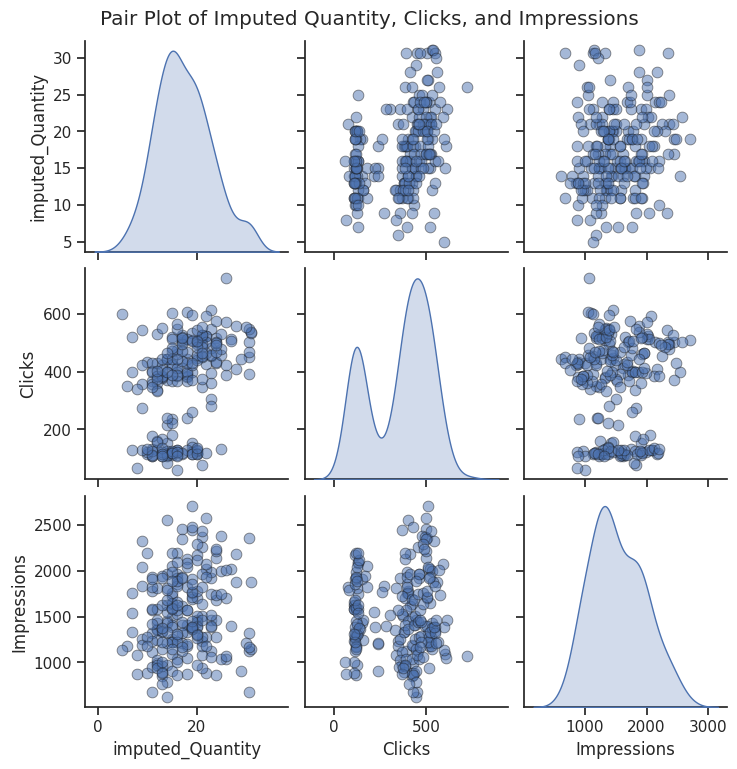

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Load the Excel file
file_path = '/content/drive/MyDrive/Data/enhanced_file.xlsx'
excel_data = pd.ExcelFile(file_path)

# Display the sheet names to understand the structure of the file
sheet_names = excel_data.sheet_names
sheet_names

# Load the data from the first sheet to inspect the content
data = excel_data.parse('Sheet1')

# Selecting only the relevant columns for the pair plot
data_subset = data[['imputed_Quantity', 'Clicks', 'Impressions']]

# Set the plot style
sns.set(style="ticks")

# Create the pair plot
sns.pairplot(data_subset, diag_kind="kde", plot_kws={'alpha':0.5, 's':60, 'edgecolor':'k'})

# Show the plot
plt.suptitle('Pair Plot of Imputed Quantity, Clicks, and Impressions', y=1.02)
plt.show()




**Insights**
- **Scatter Patterns**: Each scatter plot reveals relationships between pairs of variables:
  - If points form a linear pattern, it indicates a potential correlation.
  - A dense cluster of points can signify common value ranges.
- **KDE Plots**: The diagonal shows the distribution for each variable, helping identify whether data is skewed, normal, or has multiple peaks.

This pair plot will provide a comprehensive view of possible correlations, helping you assess whether higher values in one variable relate to increases or decreases in another.

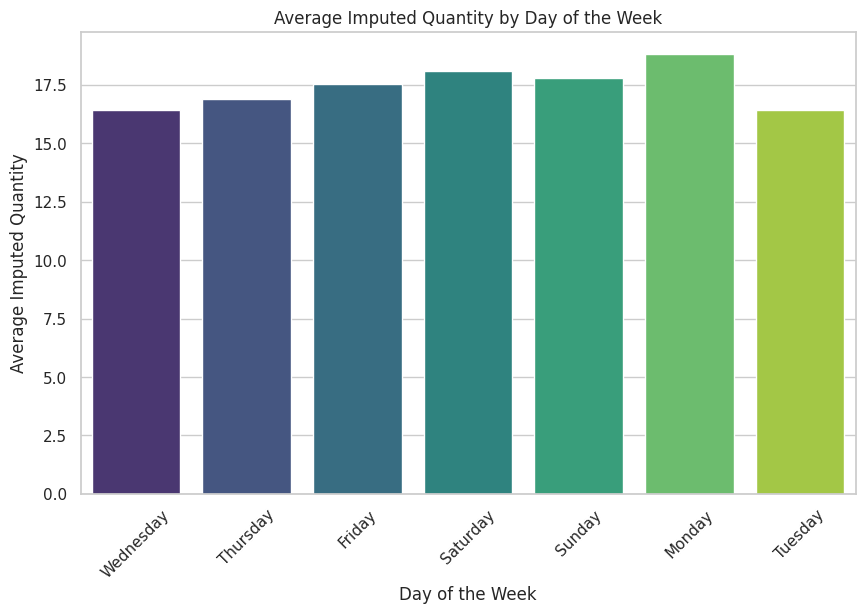

In [ ]:
import pandas as pd

# Load the dataset
file_path = '/content/drive/MyDrive/Data/enhanced_file.xlsx'
data = pd.read_excel(file_path)

import warnings
import seaborn as sns
import matplotlib.pyplot as plt

# Ignore future warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Set up the plot style
sns.set(style="whitegrid")

# Plot the average imputed quantity per day of the week
plt.figure(figsize=(10, 6))
sns.barplot(data=data, x='Day of Week', y='imputed_Quantity', estimator='mean', ci=None, palette='viridis')
plt.title('Average Imputed Quantity by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Imputed Quantity')
plt.xticks(rotation=45)
plt.show()



Here are a few specific insights I was gaining:

- **High or Low Days**: Certain days were consistently showing higher or lower averages, indicating a possible weekly pattern or trend, such as higher imputed quantities on specific business days.
- **Operational Efficiency**: Recognizing these patterns was helping me better understand resource allocation or inventory planning needs. For instance, if the imputed quantity peaked on Wednesdays and Thursdays, it suggested that these might be busier days requiring more resources.
- **Potential Anomalies**: If any particular day deviated significantly from others, it was hinting at anomalies, seasonality, or special circumstances affecting data on those specific days.


**Weekdays vs Weekends**

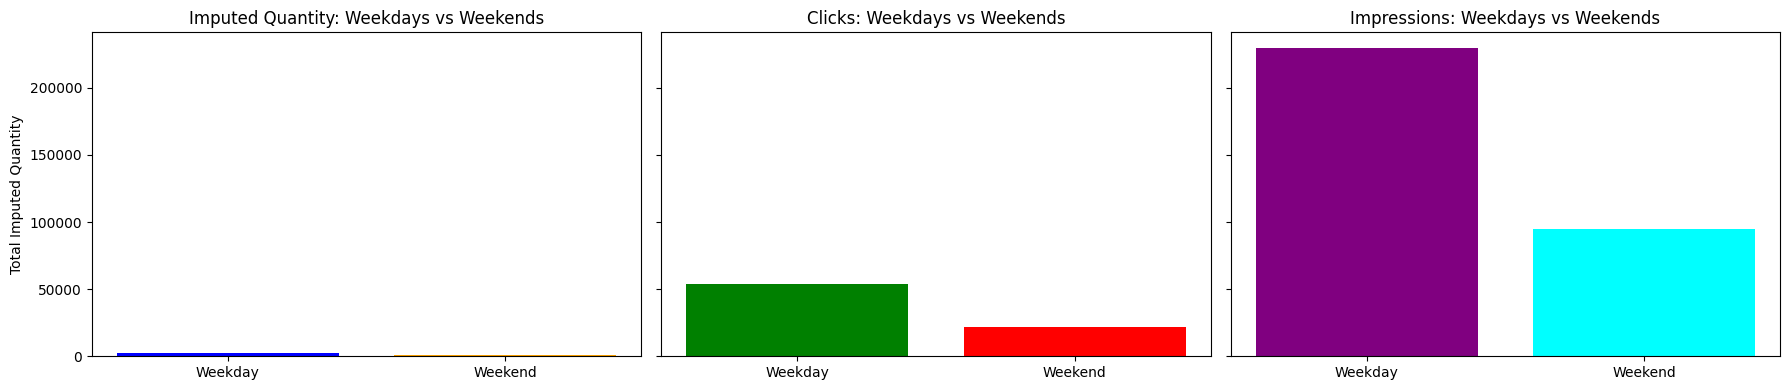

  Day Type  imputed_Quantity  Clicks  Impressions
0  Weekday           2618.68   53822       229914
1  Weekend           1076.67   22117        94807


In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Specify the path to the dataset
file_path = '/content/drive/MyDrive/Data/enhanced_file.xlsx'

# Step 2: Load the Excel file
data = pd.ExcelFile(file_path)

# Step 3: Load the sheet and preview the data
df = data.parse('Sheet1')

# Add a column to distinguish weekdays and weekends
df['Day Type'] = df['Weekend'].apply(lambda x: 'Weekend' if x == 1 else 'Weekday')

# Aggregate data for weekdays and weekends
aggregates = df.groupby('Day Type').agg({
    'imputed_Quantity': 'sum',
    'Clicks': 'sum',
    'Impressions': 'sum'
}).reset_index()



# Plot the aggregated data
fig, axes = plt.subplots(1, 3, figsize=(18, 4), sharey=True)

# Bar plot for imputed_Quantity
axes[0].bar(aggregates['Day Type'], aggregates['imputed_Quantity'], color=['blue', 'orange'])
axes[0].set_title('Imputed Quantity: Weekdays vs Weekends')
axes[0].set_ylabel('Total Imputed Quantity')

# Bar plot for Clicks
axes[1].bar(aggregates['Day Type'], aggregates['Clicks'], color=['green', 'red'])
axes[1].set_title('Clicks: Weekdays vs Weekends')

# Bar plot for Impressions
axes[2].bar(aggregates['Day Type'], aggregates['Impressions'], color=['purple', 'cyan'])
axes[2].set_title('Impressions: Weekdays vs Weekends')

# Adjust layout and show plots
plt.tight_layout()
plt.show()

# Display the aggregated data
print(aggregates)


**Percentage Distribution of Daily Clicks and Impressions by Day of the Week**

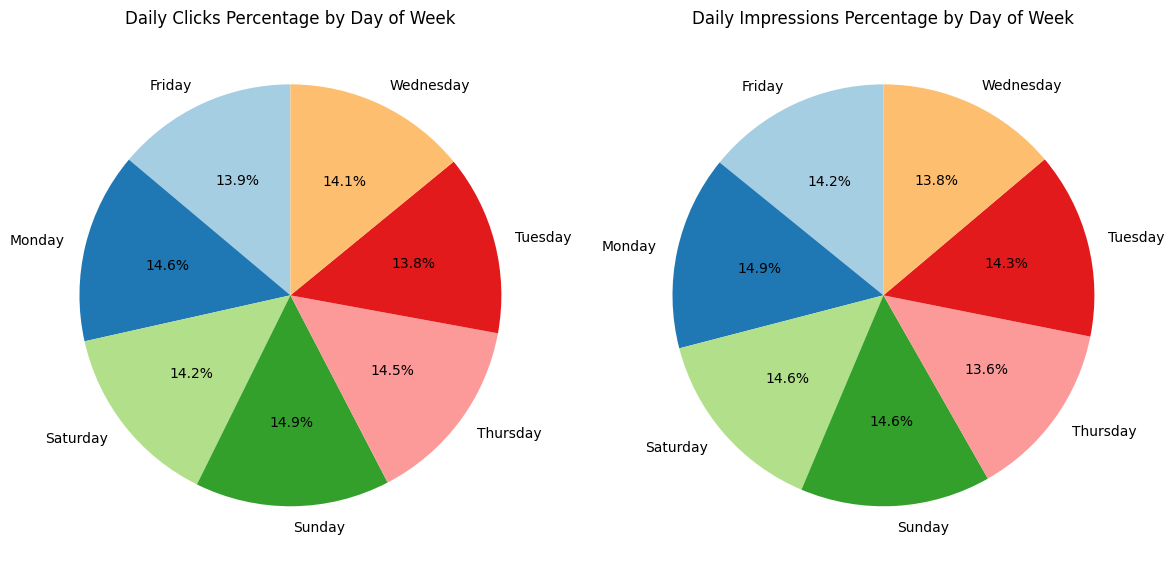

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
file_path = '/content/drive/MyDrive/Data/enhanced_file.xlsx'
data = pd.read_excel(file_path, sheet_name='Sheet1')

# Convert 'Day Index' to datetime format
data['Day Index'] = pd.to_datetime(data['Day Index'])

# Extract 'Day of Week' for grouping
data['Day of Week'] = data['Day Index'].dt.day_name()

# Group by 'Day of Week' and sum Clicks and Impressions
daily_data = data.groupby('Day of Week')[['Clicks', 'Impressions']].sum()

# Calculate percentage for Clicks and Impressions
daily_data_percent = daily_data / daily_data.sum() * 100

# Plotting the pie charts
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Clicks percentage by Day of Week
axs[0].pie(daily_data_percent['Clicks'], labels=daily_data_percent.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
axs[0].set_title('Daily Clicks Percentage by Day of Week')

# Impressions percentage by Day of Week
axs[1].pie(daily_data_percent['Impressions'], labels=daily_data_percent.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
axs[1].set_title('Daily Impressions Percentage by Day of Week')

# Show the plots
plt.tight_layout()
plt.show()

I explored daily marketing trends by day of week. I loaded data, converted dates, and extracted the day of the week. I then grouped data by day and calculated the sum of Clicks and Impressions. To compare days, I converted these values to percentages. Finally, I created two pie charts, one for Clicks and one for Impressions, showing the percentage distribution across each day of the week.

 **Correlation Heatmap**

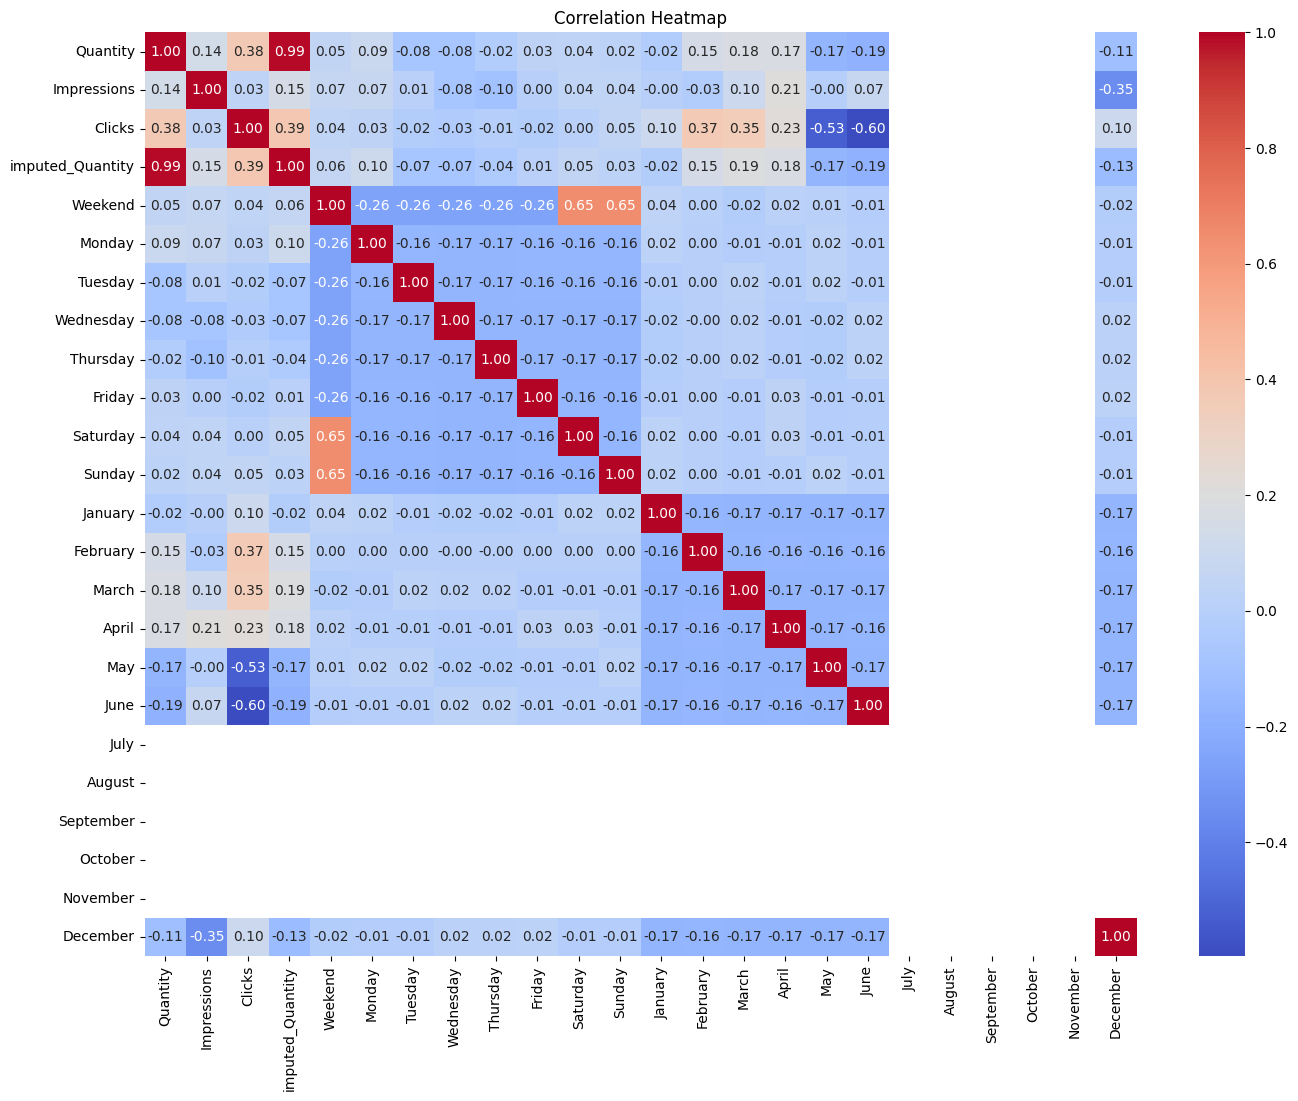

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

dataset = '/content/drive/MyDrive/Data/enhanced_file.xlsx'
# Load the dataset into a Pandas DataFrame
df = pd.read_excel(dataset)

# Select only numerical columns for correlation calculation
numerical_data = df.select_dtypes(include=['int64', 'float64']) # Use the DataFrame 'df'

# Calculate the correlation matrix
correlation_matrix = numerical_data.corr()

# Plot the correlation heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()



**Through the above correlation heatmap we can say that**

*   Clicks have good correlation with Quantity

*   Impressions also have slight relation with Quantity

*   Impressions have tiny relation with Clicks






I was using a correlation heatmap to understand relationships between variables in my dataset. It provided a visual summary of how each pair of variables correlated. Here's what I gained:

1. **Strength and Direction of Relationships**: I saw how each pair of variables was correlated, with values close to 1 indicating a strong positive relationship, -1 showing a negative one, and 0 showing weak or no correlation. For example, I found that higher "imputed quantity" correlated with higher "impressions."

2. **Key Influencers**: I identified closely related variables. For example, I noticed that more "impressions" generally led to more "clicks," suggesting that optimizing impressions could boost clicks.

3. **Redundancies**: I spotted redundant variables, like "imputed quantity" and "quantity," which had high correlation, helping me simplify my dataset by focusing on one.

4. **Outliers and Patterns**: I detected unexpected relationships, like weak correlations between "clicks" and "impressions," prompting me to explore potential outliers or missing data.

The heatmap helped me quickly visualize these insights, guiding further analysis and decision-making.

 **Statistical Summary**

I was analyzing the **Quantity** column, which represented the daily quantity of items sold, allowing me to identify trends in demand. I was noticing that higher values were indicating periods of increased sales, which could have been due to seasonal trends, promotions, or weekends. The daily variations in quantity were showing potential fluctuations in demand, which seemed to be correlating with specific days of the week or months.

When I was examining **Impressions and Clicks**, these columns were giving me insights into online engagement and user interest, especially from a digital marketing or e-commerce perspective. The impressions were indicating how many times the items were displayed, while the clicks showed how often they were interacted with.

I was also looking into **imputed_Quantity**, which appeared to provide estimated values for quantities where original data might have been missing. By comparing this with the actual Quantity column, I was able to evaluate the accuracy of these imputed values and determine how closely they aligned with actual sales trends.

The **Temporal Variables** such as "Day of Week" and "Weekend" were allowing me to examine if there were consistent patterns across specific days or weekends. I was noticing, for example, that weekends could show varying sales due to shopping behaviors. The "Month Name" column, along with one-hot encoded variables for each month, was giving me insights into monthly or seasonal variations in demand.

Lastly, I was observing **Seasonal and Day-Based Patterns** through the one-hot encoded month columns, which helped me track seasonal trends directly. Higher quantities during specific months, such as December, were suggesting a strong seasonal influence, likely from holiday sales. Similarly, by observing trends based on days like "Monday" or "Friday," I was noticing patterns that might indicate day-specific demand spikes, such as on weekends.


# **Milestone 2: Week 3 | Module 3: Time Series Modelling**
## Sub Module 3.1: Model Selection
* Within time series modelling, we'll be exploring univariate models.

## Sub Module 3.2: Model Fitting
* To identify the optimal model parameters. This involves trying different parameter combinations and selecting the one with the lowest error metric.


# **Understanding the Data:**

Inspecting the time series data for patterns using visualizations like line plots.

**MONTHLY TRENDS OF IMPUTED DATA ANALYSIS**

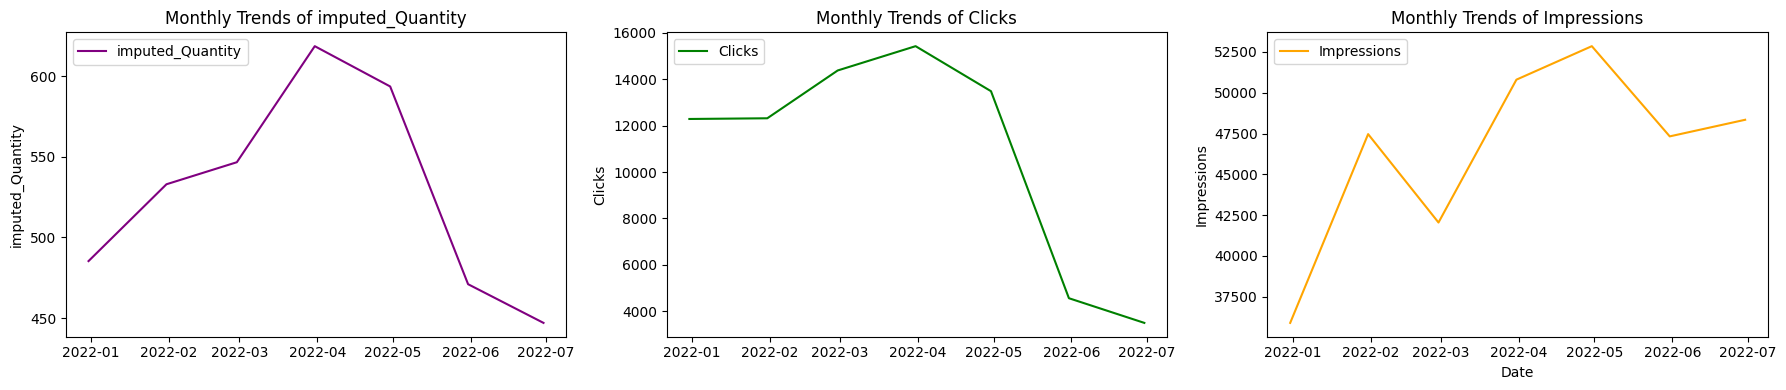

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from matplotlib.ticker import MultipleLocator

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Load the data
file_path = '/content/drive/MyDrive/Data/enhanced_file.xlsx'
data = pd.read_excel(file_path, sheet_name='Sheet1')

# Convert 'Day Index' to datetime format
data['Day Index'] = pd.to_datetime(data['Day Index'])

# Set 'Day Index' as the index for easier resampling by month
data.set_index('Day Index', inplace=True)

# Resample to monthly data, summing up the values for the relevant columns
monthly_data = data.resample('M').sum()[['imputed_Quantity', 'Clicks', 'Impressions']]

# Create subplots
fig, axs = plt.subplots(1, 3, figsize=(18,4), sharex=True)

# Set y-axis tick intervals to 50 for the specified axis
axs[0].yaxis.set_major_locator(ticker.MultipleLocator(50))

axs[0].plot(monthly_data.index, monthly_data['imputed_Quantity'], label='imputed_Quantity', color='purple')
axs[0].set_ylabel('imputed_Quantity')
axs[0].set_title('Monthly Trends of imputed_Quantity')
axs[0].legend(loc='upper left')

# Plot Clicks
axs[1].plot(monthly_data.index, monthly_data['Clicks'], label='Clicks', color='green')
axs[1].set_ylabel('Clicks')
axs[1].set_title('Monthly Trends of Clicks')
axs[1].legend(loc='upper left')

# Plot Impressions
axs[2].plot(monthly_data.index, monthly_data['Impressions'], label='Impressions', color='orange')
axs[2].set_ylabel('Impressions')
axs[2].set_xlabel('Date')
axs[2].set_title('Monthly Trends of Impressions')
axs[2].legend(loc='upper left')

# Improve layout and show plot
plt.tight_layout()
plt.show()



I was analyzing the trends of imputed_Quantity, Clicks, and Impressions, observing seasonal patterns, spikes, and drops. I was noting correlations, identifying anomalies, and understanding how impressions and clicks were influencing the imputed_Quantity over time.

**WEEKLY DEMANDS AND TRENDS**

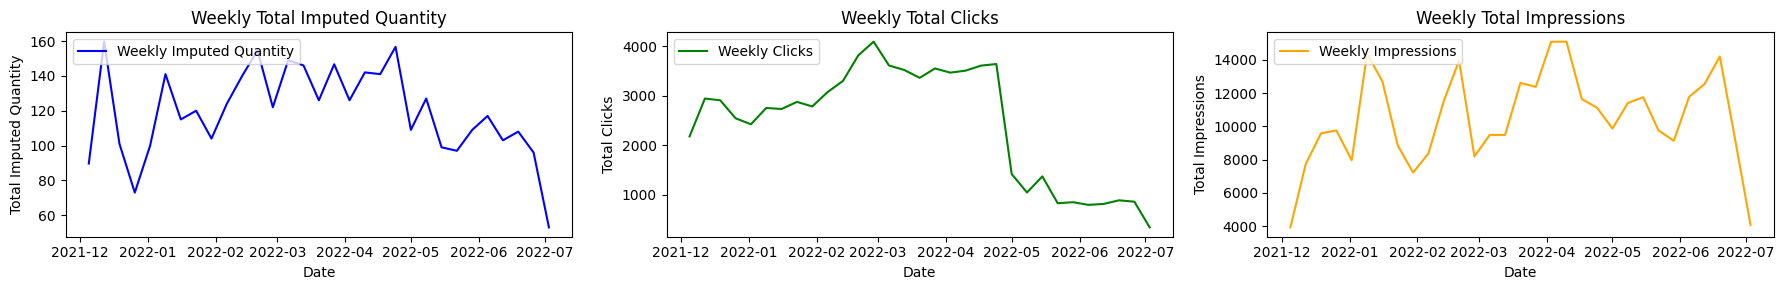

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
file_path = '/content/drive/MyDrive/Data/enhanced_file.xlsx'
data = pd.read_excel(file_path, sheet_name='Sheet1')

# Convert 'Day Index' to datetime format
data['Day Index'] = pd.to_datetime(data['Day Index'])

# Set 'Day Index' as the index for easier resampling by week
data.set_index('Day Index', inplace=True)

# Resample to weekly data, summing up the values for imputed_Quantity, Clicks, and Impressions
weekly_data = data.resample('W').sum()[['imputed_Quantity', 'Clicks', 'Impressions']]

# Plotting the weekly data with subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 3), sharex=True)

# Imputed Quantity plot
axs[0].plot(weekly_data.index, weekly_data['imputed_Quantity'], label='Weekly Imputed Quantity', color='blue')
axs[0].set_ylabel('Total Imputed Quantity')
axs[0].legend(loc='upper left')
axs[0].set_title('Weekly Total Imputed Quantity')

# Clicks plot
axs[1].plot(weekly_data.index, weekly_data['Clicks'], label='Weekly Clicks', color='green')
axs[1].set_ylabel('Total Clicks')
axs[1].legend(loc='upper left')
axs[1].set_title('Weekly Total Clicks')

# Impressions plot
axs[2].plot(weekly_data.index, weekly_data['Impressions'], label='Weekly Impressions', color='orange')
axs[2].set_ylabel('Total Impressions')
axs[2].legend(loc='upper left')
axs[2].set_title('Weekly Total Impressions')

# Label the x-axis
axs[0].set_xlabel('Date')
axs[1].set_xlabel('Date')
axs[2].set_xlabel('Date')

# Improve layout and show plot
plt.tight_layout()
plt.show()



I analyzed weekly marketing data. I loaded it, converted dates to datetime, and resampled by week, summing 'Imputed Quantity', 'Clicks', and 'Impressions'.  Finally, I plotted each metric (Quantity, Clicks, Impressions) on a separate subplot within a larger figure, sharing the x-axis for easy comparison.

**DAYWISE ANALYSIS THROUGH TIME**

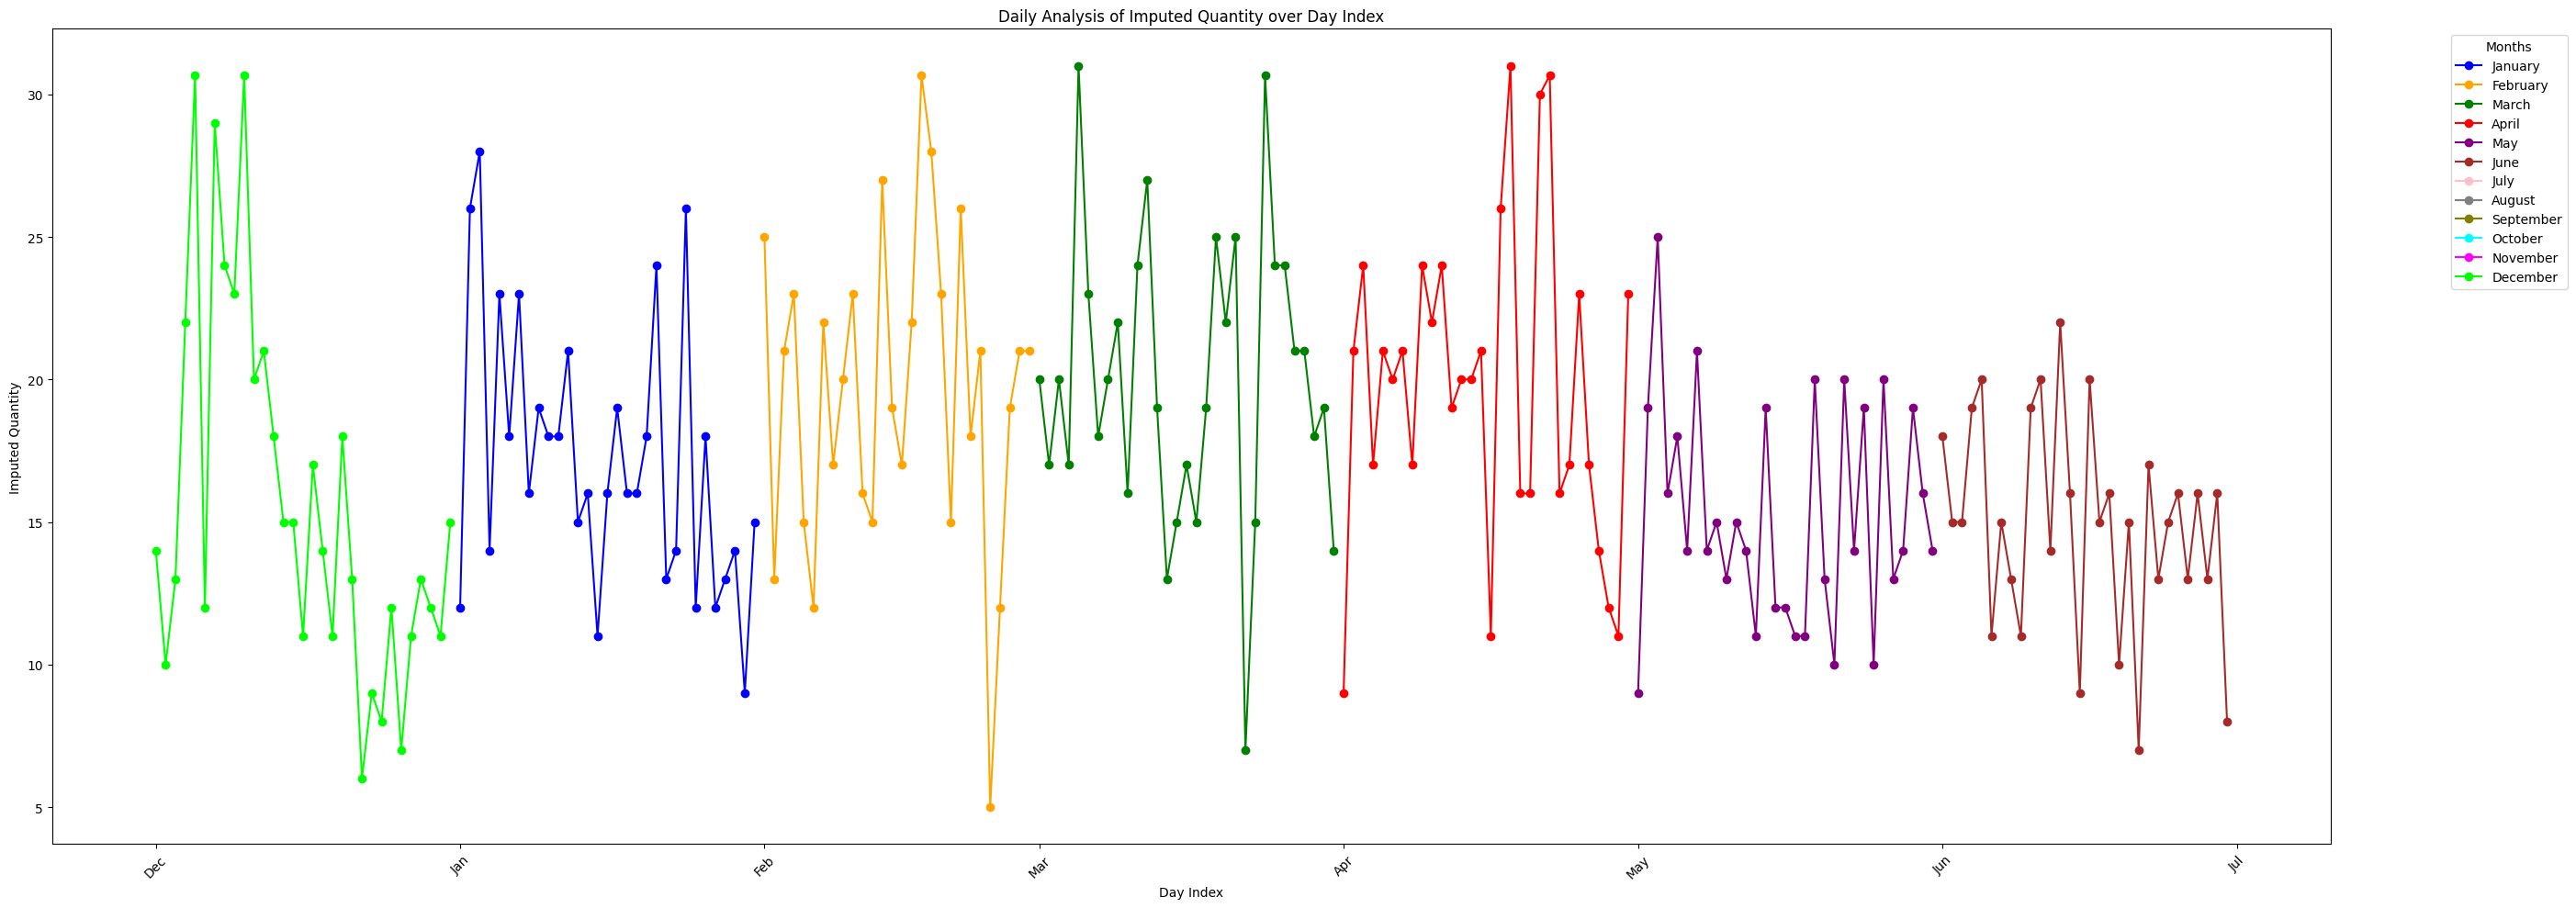

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd

# Load the dataset
dataset = pd.read_excel('/content/drive/MyDrive/Data/enhanced_file.xlsx')

# Ensure 'Day Index' is in datetime format
dataset['Day Index'] = pd.to_datetime(dataset['Day Index'])

# Set up the colors for each month
colors = [
    "blue", "orange", "green", "red", "purple", "brown",
    "pink", "gray", "olive", "cyan", "magenta", "lime"
]
months = [
    "January", "February", "March", "April", "May", "June",
    "July", "August", "September", "October", "November", "December"
]

# Plotting with markers for each month
plt.figure(figsize=(28, 10))
for month, color in zip(months, colors):
    month_data = dataset[dataset['Month Name'] == month]
    plt.plot(
        month_data['Day Index'], month_data['imputed_Quantity'],  # Updated column
        marker='o', linestyle='-',
        label=month, color=color
    )

# Display the plot with updated settings
plt.title("Daily Analysis of Imputed Quantity over Day Index")
plt.xlabel("Day Index")
plt.ylabel("Imputed Quantity")

# Configure date formatting for x-axis
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%b"))
plt.xticks(rotation=45)
plt.legend(title="Months", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


I was visualizing daily 'Imputed Quantity' trends. I loaded data from an Excel file, ensured correct date formatting, and added a 'Month' column for grouping. I plotted each month's data with a unique color and marker, customizing the plot with labels, title, and legend.


**DAILY TRENDS FOR CLICKS THROUGH TIME**

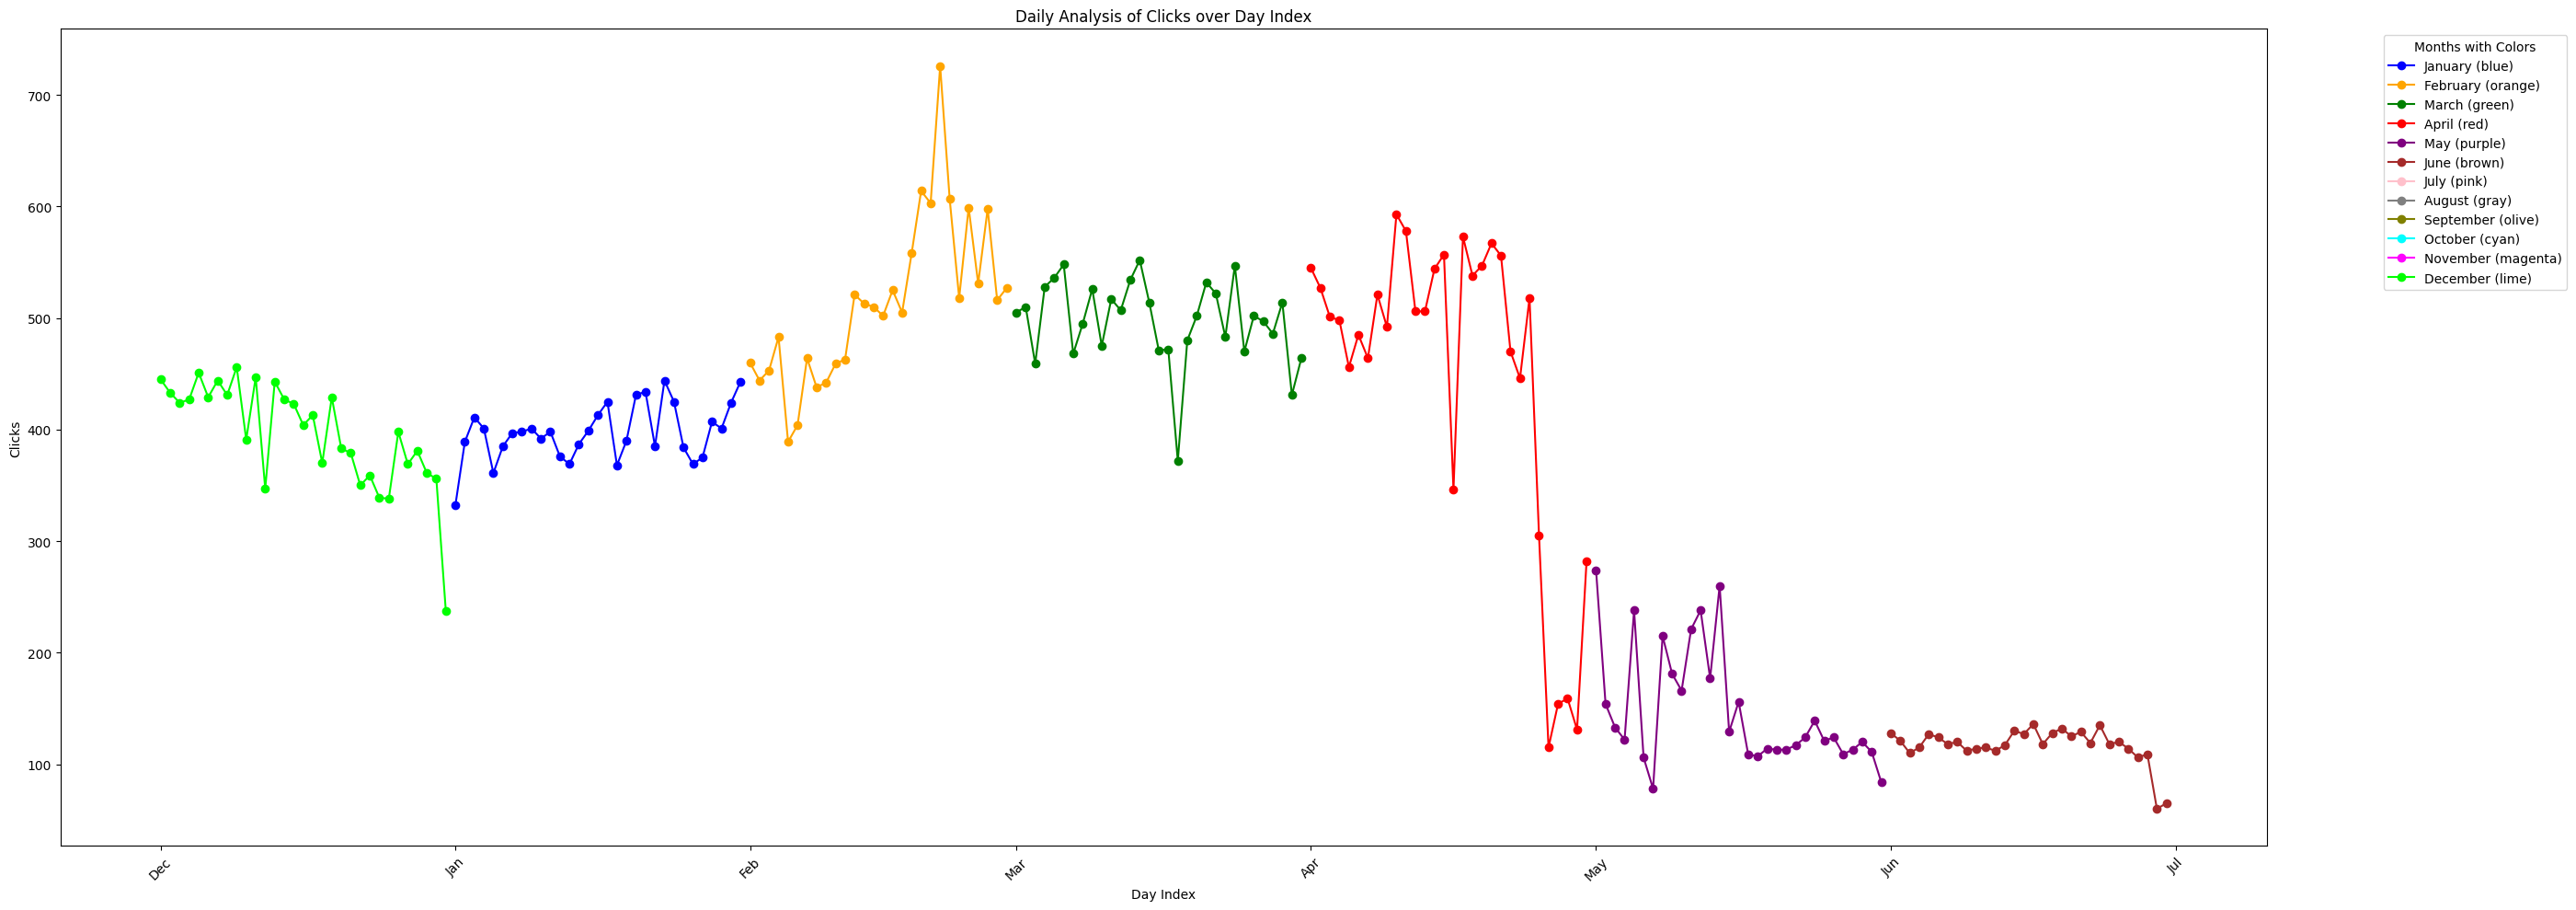

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
import numpy as np

# Load your dataset
dataset = pd.read_excel('/content/drive/MyDrive/Data/enhanced_file.xlsx')

# Ensure 'Day Index' is in datetime format if it isn't already
dataset['Day Index'] = pd.to_datetime(dataset['Day Index'])

# Adding a Month column for easy grouping
dataset['Month'] = dataset['Day Index'].dt.month

# Set up the colors for each month
colors = [
    "blue", "orange", "green", "red", "purple", "brown",
    "pink", "gray", "olive", "cyan", "magenta", "lime"
]
months = [
    "January", "February", "March", "April", "May", "June",
    "July", "August", "September", "October", "November", "December"
]

# Plotting with markers for each month
plt.figure(figsize=(28, 10))
for month, color in zip(range(1, 13), colors):
    month_data = dataset[dataset['Month'] == month]
    plt.plot(month_data['Day Index'], month_data['Clicks'], marker='o', linestyle='-',
         label=f"{months[month-1]} ({color})", color=color)


# Display the plot with updated settings
plt.title("Daily Analysis of Clicks over Day Index")
plt.xlabel("Day Index")
plt.ylabel("Clicks")

# Configure date formatting for x-axis
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%b"))
plt.xticks(rotation=45)
plt.legend(title="Months with Colors", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

I analyzed daily click trends across months. I loaded data, converted dates, and added a 'Month' column for grouping.  Using different colors for each month, I plotted click data for each month with markers on a single graph.  I formatted the x-axis to display month abbreviations with rotated labels for improved readability. The title, labels, and legend provided context for the visualization.

**DAYWISE TRENDS FOR IMPRESSIONS THROUGH TIME**

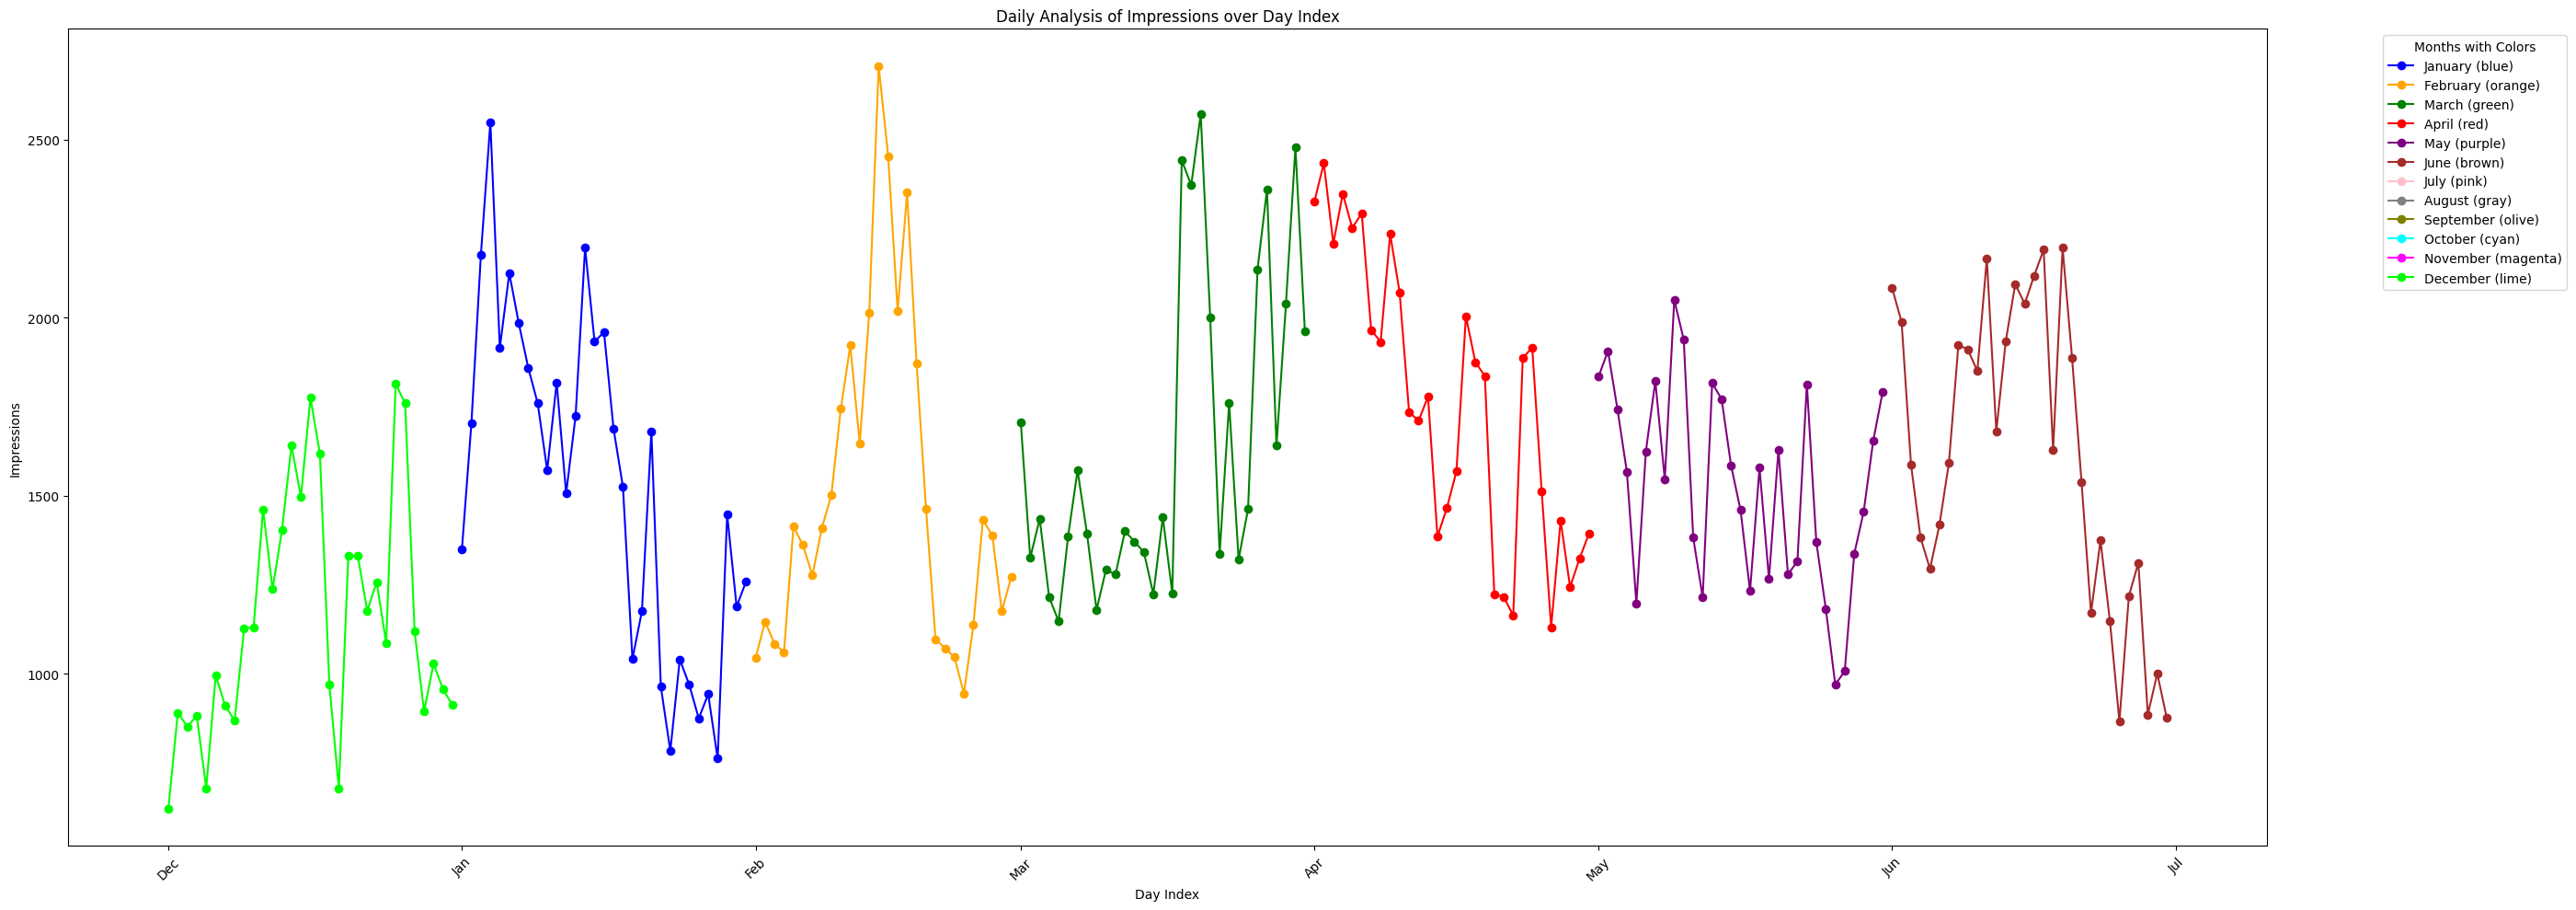

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
import numpy as np

# Load your dataset
dataset = pd.read_excel('/content/drive/MyDrive/Data/enhanced_file.xlsx')

# Ensure 'Day Index' is in datetime format if it isn't already
dataset['Day Index'] = pd.to_datetime(dataset['Day Index'])

# Adding a Month column for easy grouping
dataset['Month'] = dataset['Day Index'].dt.month

# Set up the colors for each month
colors = [
    "blue", "orange", "green", "red", "purple", "brown",
    "pink", "gray", "olive", "cyan", "magenta", "lime"
]
months = [
    "January", "February", "March", "April", "May", "June",
    "July", "August", "September", "October", "November", "December"
]

# Plotting with markers for each month
plt.figure(figsize=(28, 10))
for month, color in zip(range(1, 13), colors):
    month_data = dataset[dataset['Month'] == month]
    plt.plot(month_data['Day Index'], month_data['Impressions'], marker='o', linestyle='-',
         label=f"{months[month-1]} ({color})", color=color)


# Display the plot with updated settings
plt.title("Daily Analysis of Impressions over Day Index")
plt.xlabel("Day Index")
plt.ylabel("Impressions")

# Configure date formatting for x-axis
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%b"))
plt.xticks(rotation=45)
plt.legend(title="Months with Colors", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

I examined daily impression trends throughout the year. I loaded the data, converted dates to datetime format, and created a 'Month' column for grouping.  Each month was assigned a unique color, and I plotted daily impressions for each month with markers on a single graph. The x-axis was formatted to display month abbreviations with rotated labels for better readability. The title, labels, and legend provided context for the visualization.

### **Time Series Analysis Modelling**

**Checking Stationarity of the Data**

In [ ]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller

# Specify the path to your dataset
file_path = '/content/drive/MyDrive/Data/enhanced_file.xlsx'

# Load the dataset
merged_df = pd.read_excel(file_path)

# Ensure 'Day Index' or equivalent column is set as the index if necessary
if 'Day Index' in merged_df.columns:
    merged_df.set_index('Day Index', inplace=True)

# Drop the row corresponding to '2021-12-01' (ensure it's in the index or a column)
merged_df = merged_df.drop('2021-12-01', errors='ignore')  # Ignore errors if the row doesn't exist

# Define the ADF test function
def adfuller_test(series, series_name, signif=0.05):
    result = adfuller(series, autolag='AIC')
    print(f'ADF Statistic for {series_name}:', result[0])
    print(f'p-value for {series_name}:', result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print(f'\t{key}: {value}')
    if result[1] <= signif:
        print(f" => {series_name} is Stationary. (Reject the null hypothesis)")
    else:
        print(f" => {series_name} is Non-Stationary. (Fail to reject the null hypothesis)")
    print("_" * 70)

# Perform the ADF test on the specified columns
columns_to_test = ["Quantity", "Clicks", "Impressions"]
for column in columns_to_test:
    if column in merged_df.columns:
        print(f"ADF Test for {column}:")
        adfuller_test(merged_df[column], column)
    else:
        print(f"Column '{column}' not found in the dataset. Skipping.")


ADF Test for Quantity:
ADF Statistic for Quantity: -4.367620230980512
p-value for Quantity: 0.0003385461344077799
Critical Values:
	1%: -3.4623415245233145
	5%: -2.875606128263243
	10%: -2.574267439846904
 => Quantity is Stationary. (Reject the null hypothesis)
______________________________________________________________________
ADF Test for Clicks:
ADF Statistic for Clicks: -0.8688298465462805
p-value for Clicks: 0.7980638515774867
Critical Values:
	1%: -3.4621857592784546
	5%: -2.875537986778846
	10%: -2.574231080806213
 => Clicks is Non-Stationary. (Fail to reject the null hypothesis)
______________________________________________________________________
ADF Test for Impressions:
ADF Statistic for Impressions: -5.609843346852916
p-value for Impressions: 1.2105276807792978e-06
Critical Values:
	1%: -3.461878735881654
	5%: -2.875403665910809
	10%: -2.574159410430839
 => Impressions is Stationary. (Reject the null hypothesis)
__________________________________________________________

*Quantity and Impressions are Stationary.But Clicks are Non-Stationary*

**Making clicks stationary**

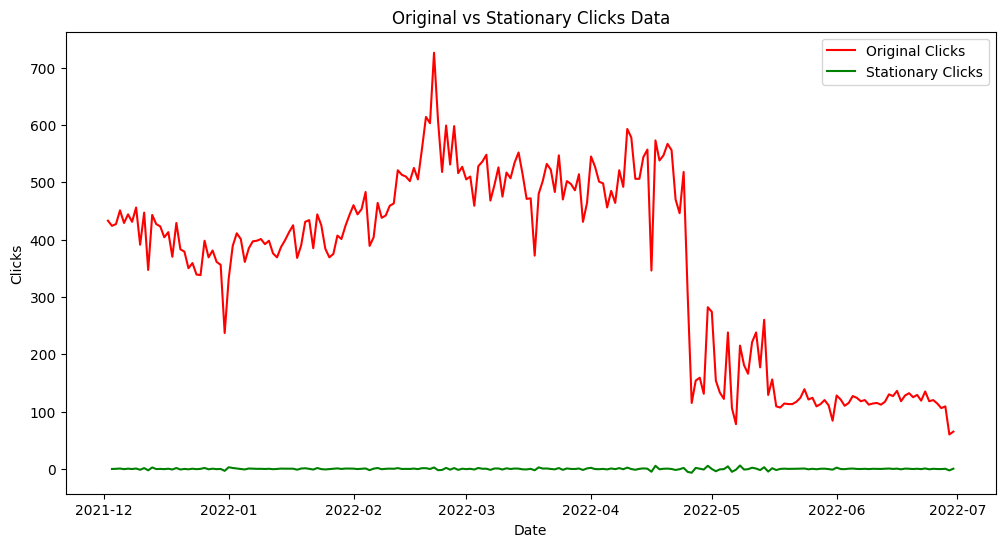

In [ ]:
import numpy as np
# Function to make a series stationary
def make_stationary(series):
    series_log = np.sqrt(series)
    series_diff = series_log.diff().dropna()
    return series_diff

# Apply the function to the "Clicks" series
merged_df['Clicks_stationary'] = make_stationary(merged_df['Clicks'])

# Plotting the original and stationary "Clicks" data
plt.figure(figsize=(12, 6))
plt.plot(merged_df.index, merged_df['Clicks'], label='Original Clicks', color='red')
plt.plot(merged_df.index, merged_df['Clicks_stationary'], label='Stationary Clicks', color='green')
plt.title('Original vs Stationary Clicks Data')
plt.xlabel('Date')
plt.ylabel('Clicks')
plt.legend()
plt.show()

**Stationarity Correction**

ADF Test for Quantity:
ADF Statistic for Quantity: -4.367620230980512
p-value for Quantity: 0.0003385461344077799
Critical Values:
	1%: -3.4623415245233145
	5%: -2.875606128263243
	10%: -2.574267439846904
 => Quantity is Stationary. (Reject the null hypothesis)
______________________________________________________________________
ADF Test for Clicks:
ADF Statistic for Clicks: -0.8688298465462805
p-value for Clicks: 0.7980638515774867
Critical Values:
	1%: -3.4621857592784546
	5%: -2.875537986778846
	10%: -2.574231080806213
 => Clicks is Non-Stationary. (Fail to reject the null hypothesis)
______________________________________________________________________
ADF Test for Impressions:
ADF Statistic for Impressions: -5.609843346852916
p-value for Impressions: 1.2105276807792978e-06
Critical Values:
	1%: -3.461878735881654
	5%: -2.875403665910809
	10%: -2.574159410430839
 => Impressions is Stationary. (Reject the null hypothesis)
__________________________________________________________

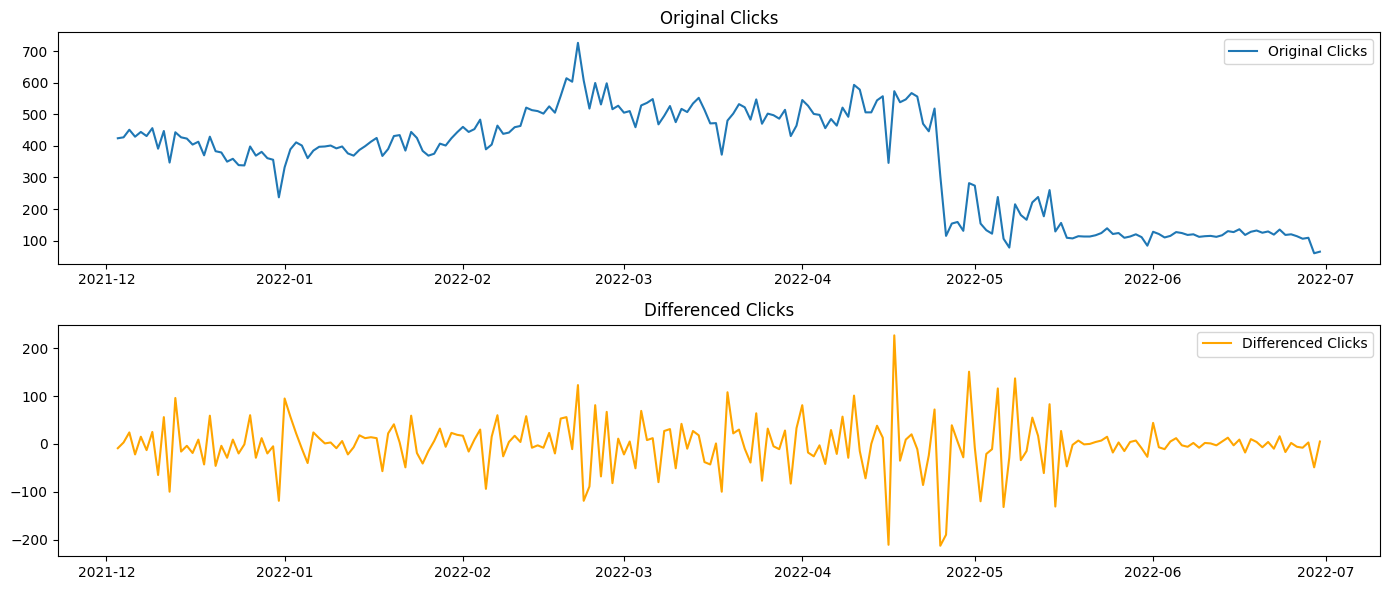

In [ ]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt

# Function to perform the ADF test
def adfuller_test(series, series_name, signif=0.05):
    result = adfuller(series, autolag='AIC')
    print(f'ADF Statistic for {series_name}:', result[0])
    print(f'p-value for {series_name}:', result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print(f'\t{key}: {value}')
    if result[1] <= signif:
        print(f" => {series_name} is Stationary. (Reject the null hypothesis)")
    else:
        print(f" => {series_name} is Non-Stationary. (Fail to reject the null hypothesis)")
    print("_" * 70)

# Load the dataset (replace the path with your dataset's path)
file_path = '/content/drive/MyDrive/Data/enhanced_file.xlsx'
merged_df = pd.read_excel(file_path)

# Ensure 'Day Index' or equivalent column is set as the index if necessary
if 'Day Index' in merged_df.columns:
    merged_df.set_index('Day Index', inplace=True)

# Drop the row corresponding to '2021-12-01' (ensure it's in the index or a column)
merged_df = merged_df.drop('2021-12-01', errors='ignore')  # Ignore errors if the row doesn't exist

# Check stationarity for each column
columns_to_test = ["Quantity", "Clicks", "Impressions"]
for column in columns_to_test:
    if column in merged_df.columns:
        print(f"ADF Test for {column}:")
        adfuller_test(merged_df[column], column)
    else:
        print(f"Column '{column}' not found in the dataset. Skipping.")

# Correcting Non-Stationary "Clicks" Column
if "Clicks" in merged_df.columns:
    print("Applying differencing to make 'Clicks' stationary...")
    merged_df['Clicks_diff'] = merged_df['Clicks'].diff()

    # Remove NA values resulting from differencing
    merged_df = merged_df.dropna(subset=['Clicks_diff'])

    # Perform ADF test again to check stationarity
    print("ADF Test for differenced 'Clicks':")
    adfuller_test(merged_df['Clicks_diff'], 'Clicks_diff')

# Visualize the original and differenced data
if "Clicks_diff" in merged_df.columns:
    plt.figure(figsize=(14, 6))

    # Original data
    plt.subplot(2, 1, 1)
    plt.plot(merged_df.index, merged_df['Clicks'], label='Original Clicks')
    plt.title('Original Clicks')
    plt.legend()

    # Differenced data
    plt.subplot(2, 1, 2)
    plt.plot(merged_df.index, merged_df['Clicks_diff'], label='Differenced Clicks', color='orange')
    plt.title('Differenced Clicks')
    plt.legend()

    plt.tight_layout()
    plt.show()


I was performing the ADF test on the "Clicks" series to confirm its non-stationary nature. I was applying first-order differencing to remove trends or seasonality and was removing NaN values caused by this step. Then, I was re-testing the stationarity and comparing the original and differenced series using line plots.

**DATA SPLIT**

In [ ]:
# Calculate the split indices
train_size = int(0.80 * len(merged_df))
val_size = int(0.10 * len(merged_df))
test_size = len(merged_df) - train_size - val_size

# Split the DataFrame
train_df = merged_df.iloc[:train_size]
val_df = merged_df.iloc[train_size:train_size + val_size]
test_df = merged_df.iloc[train_size + val_size:]

# Print the sizes of the splits
print("Train Data Size:\t", len(train_df))
print("Validation Data Size:\t", len(val_df))
print("Test Data Size:\t\t", len(test_df))

Train Data Size:	 168
Validation Data Size:	 21
Test Data Size:		 21
